---
jupyter: python3
---

**CSI 4506 Introduction à l'intelligence artificielle** <br/>
*Devoir 2 : Santé des animaux de compagnie extra-terrestres, apprentissage automatique*

# Identification

Nom : Amani Louendriz <br/>

## 1. Données

Le devoir 2 inclut deux versions du même jeu de données : l'une contenant des valeurs manquantes et l'autre sans. La version avec des valeurs manquantes a été dérivée du jeu de données complet :

- [github.com/turcotte/csi4106-f25/tree/main/assignments-data/a2](https://github.com/turcotte/csi4106-f25/tree/main/assignments-data/a2)

Dans votre cahier, vous pouvez accéder et lire les données directement depuis ce dépôt GitHub.

- [alien_pet_health-realism-clean.csv](https://raw.githubusercontent.com/turcotte/csi4106-f25/main/assignments-data/a2/alien_pet_health-realism-clean.csv)
- [alien_pet_health-realism-clean-missing.csv](https://raw.githubusercontent.com/turcotte/csi4106-f25/main/assignments-data/a2/alien_pet_health-realism-clean-missing.csv)

## 2. Tâches

Les tâches sont organisées dans un ordre particulier pour maintenir la concision et la clarté. Il y a de la flexibilité dans la structure de votre code. Améliorez son organisation en ajoutant des cellules de code si nécessaire. Vous pouvez modifier l'ordre des tâches ; par exemple, vous pourriez choisir de définir des méthodes auxiliaires au début. Néanmoins, il est crucial que l'assistant d'enseignement puisse identifier facilement les segments de code associés à chaque tâche.

(1) **Charger le jeu de données**

- Lire le fichier CSV sans données manquantes (`alien_pet_health-realism-clean.csv`).

- Afficher la forme (*shape*) des données, ainsi que les cinq premières lignes.

In [98]:
# Code Python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



'''
read_data_from_csv() transforme les données présentes dans le fichier csv vers un object pandas DataFrame
et elle retourne cet objet
'''
def read_data_from_csv() -> pd.DataFrame:
  df = pd.read_csv('https://raw.githubusercontent.com/turcotte/csi4106-f25/main/assignments-data/a2/alien_pet_health-realism-clean.csv')
  print(f'La dimension des données: {df.shape}')
  print(f'Les cinq premières lignes:\n {df.head()}')
  return df

df_clean = read_data_from_csv()

La dimension des données: (5000, 8)
Les cinq premières lignes:
    thermoreg_reading  enzyme_activity_index  dual_lobe_signal  \
0               52.6                   97.0               3.6   
1               41.8                  105.0               3.4   
2               56.2                  126.0               5.5   
3               57.7                  106.0              -4.1   
4               34.5                   73.0               2.3   

   stress_variability habitat_zone  activity_score  fasting_flag  \
0                -3.5           c2               2             0   
1                10.5           c1               2             0   
2                 9.6           c2               5             0   
3                -4.0           c1               4             0   
4                 0.3           c4               5             1   

   health_outcome  
0               1  
1               0  
2               0  
3               1  
4               1  


(2) **Analyse de la distribution des attributs** :

- Pour identifier la méthode de codage appropriée pour chaque attribut, il est utile d'examiner leurs distributions à l'aide d'outils de visualisation tels que les histogrammes. Cette analyse permettra de prendre des décisions basées sur les données concernant les stratégies de codage appropriées.

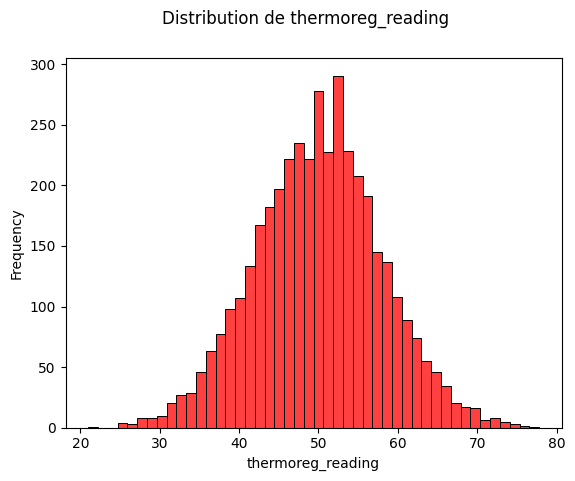

La moyenne: 50.00, Déviation Standard: 8.00, Asymétrie: 0.00, Kurtosis: 0.04


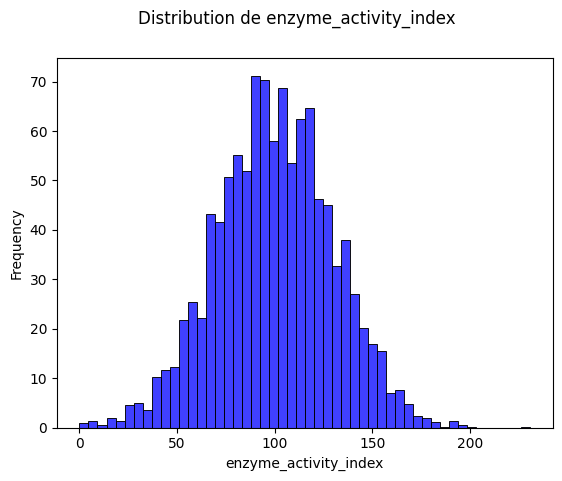

La moyenne: 100.01, Déviation Standard: 29.99, Asymétrie: -0.03, Kurtosis: 0.02


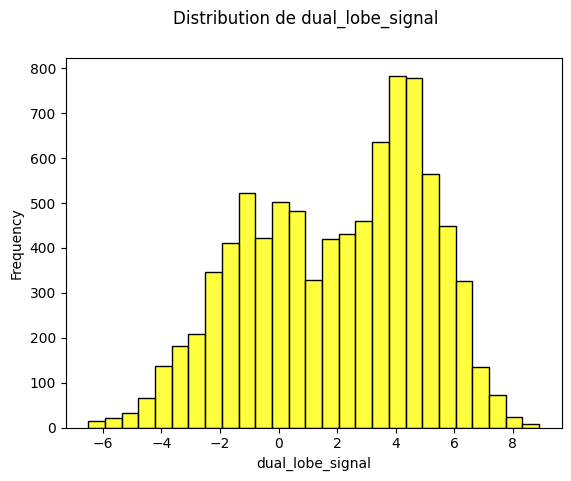

La moyenne: 2.00, Déviation Standard: 3.00, Asymétrie: -0.30, Kurtosis: -0.86


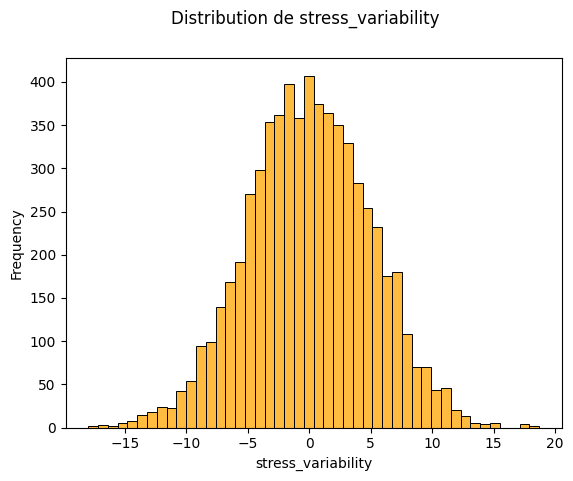

La moyenne: 0.00, Déviation Standard: 5.00, Asymétrie: -0.01, Kurtosis: -0.02


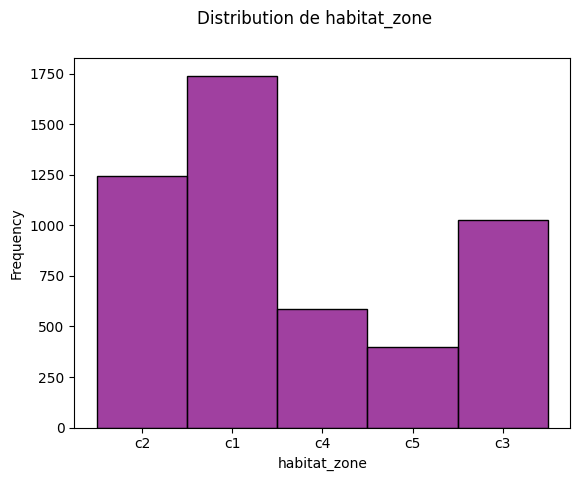

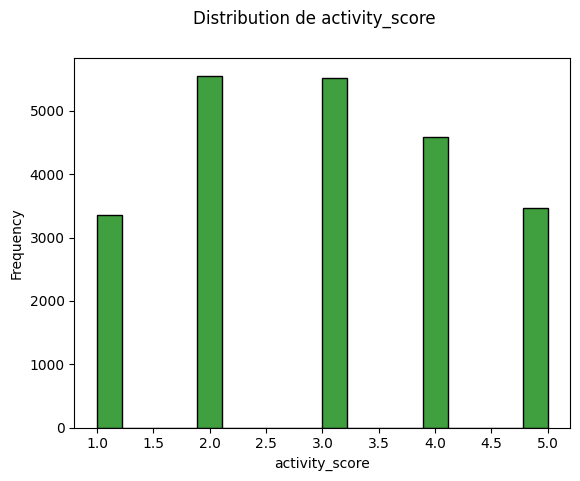

La moyenne: 2.97, Déviation Standard: 1.29, Asymétrie: 0.08, Kurtosis: -1.08


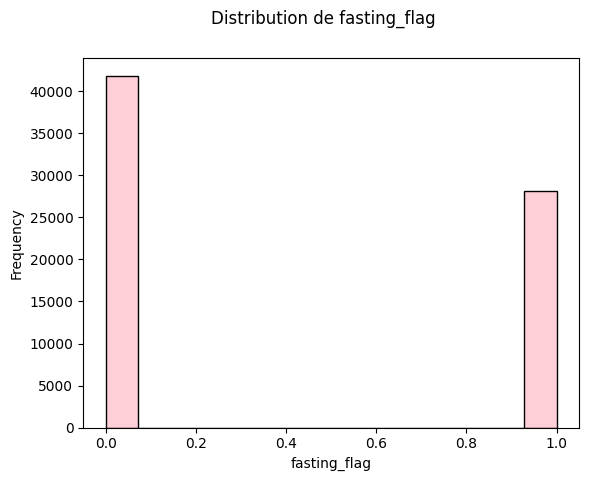

La moyenne: 0.40, Déviation Standard: 0.49, Asymétrie: 0.40, Kurtosis: -1.84


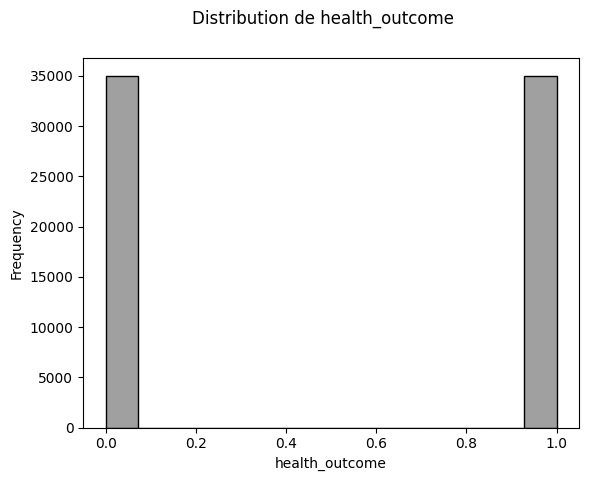

La moyenne: 0.50, Déviation Standard: 0.50, Asymétrie: 0.00, Kurtosis: -2.00


In [99]:
# Code Python
from scipy import stats
import numpy as np



'''
draw_histograms(dataset) dessine les histogrammes des différents attributs
'''

def draw_histograms(dataset):
  colors = ["red","blue","yellow","orange","purple","green","pink","grey"]
  index = 0

  for attribute in dataset.columns:
      plt.figure()
      sns.histplot(dataset[attribute],color=colors[index], stat="frequency")
      plt.suptitle(f"Distribution de {attribute}")
      plt.show()
      index+=1
      if (attribute != 'habitat_zone'):
        mean = np.mean(dataset[attribute])
        std = np.std(dataset[attribute])
        skew = stats.skew(dataset[attribute])
        kurtosis = stats.kurtosis(dataset[attribute])
        print(f"La moyenne: {mean:.2f}, Déviation Standard: {std:.2f}, Asymétrie: {skew:.2f}, Kurtosis: {kurtosis:.2f}") #Adapté de la référence1,point [1.1] voir la section des références en bas

draw_histograms(df_clean)


**Réponse**

*Distribution de thermoreg_reading*: D'après ce qui précéde; on a:

La moyenne: 50.00, Déviation Standard: 8.00, Asymétrie: 0.00, Kurtosis: 0.04

L'asymétrie est 0, donc c'est une distribution symétrique normale. Les valeurs sont numériques et continus.

*Distribution de enzyme_activity_index*: D'après ce qui précéde, on a:

La moyenne: 100.01, Déviation Standard: 29.99, Asymétrie: -0.03, Kurtosis: 0.02

L'asymétrie est négative, donc la distribution est un peu asymétrique à gauche. Les valeurs sont numériques et continus.

*Distribution de dual_lobe_signal*: D'après ce qui précéde, on a:

La moyenne: 2.00, Déviation Standard: 3.00, Asymétrie: -0.30, Kurtosis: -0.86

L'asymétrie est négative, donc la distribution est un peu asymétrique à gauche. Les valeurs sont numériques et continus.

*Distribution de stress_variability*: D'après ce qui précéde, on a:

La moyenne: 0.00, Déviation Standard: 5.00, Asymétrie: -0.01, Kurtosis: -0.02

L'asymétrie ~ 0 donc c'est une quasi distribution normale. Les valeurs sont numériques et continus.

*Distribution de habitat_zone*: D'après ce qui précéde, on voit que c'est un attribut catégoriel avec 5 valeurs: c1,c2,c3,c4,c5.

*Distribution de activity_score*: D'après ce qui précéde, on a:

La moyenne: 2.97, Déviation Standard: 1.29, Asymétrie: 0.08, Kurtosis: -1.08

C'est une distribution quasi normale un peu asymétrique à droite vu que l'asymétrie est positive. Les valeurs sont numériques mais pas continus, en fait les valeurs uniques sont une valeur de l'ensemble: {1,2,3,4,5}

*Distribution de fasting_flag*: D'après ce qui précéde, on a:

La moyenne: 0.40, Déviation Standard: 0.49, Asymétrie: 0.40, Kurtosis: -1.84

C'est une distribution asymétrique à droite vu que l'asymétrie est positive, Les valeurs sont encore numériques mais discrètes, appartenant à l'ensemble: {0,1}

*Distribution de health_outcome*: D'après ce qui précéde, on a:

La moyenne: 0.50, Déviation Standard: 0.50, Asymétrie: 0.00, Kurtosis: -2.00

C'est une distribution parfaitement symétrique normale, les valeurs sont numériques mais discrètes appartenant à l'ensemble: {0,1}




(3) **Données d'entraînement et cible** :

- Pour chaque jeu de données, définir des variables Python, telles que `X` pour les données et `y` pour la classe cible.

In [100]:
# Code Python

features = ['thermoreg_reading','enzyme_activity_index','dual_lobe_signal','stress_variability','habitat_zone','activity_score','fasting_flag']

X_clean = df_clean[features]
y_clean = df_clean['health_outcome']




(4) **Division des données** :

- Diviser le jeu de données en ensembles d'entraînement (80%) et de test (20%) en utilisant la méthode de la réserve (*hold out*).

- S'assurer que cette division se produit avant tout prétraitement pour éviter toute fuite de données.

In [101]:
# Code Python

from sklearn.model_selection import train_test_split

X_clean_train, X_clean_test, y_clean_train, y_clean_test = train_test_split(X_clean,y_clean,test_size=0.2,random_state=7)


### Prétraitement des données

(5) **Codage des variables catégorielles** :

- Transformer toutes les variables catégoriques en utilisant des techniques de codage appropriées disponibles dans [sklearn.preprocessing](https://scikit-learn.org/stable/api/sklearn.preprocessing.html). Pour plus de conseils, consultez la section [Prétraitement des Données](https://scikit-learn.org/stable/modules/preprocessing.html) du guide de l'utilisateur. Fournir une justification pour la méthode de codage sélectionnée.

**Réponse**

habitat_zone est un attribut catégoriel avec 5 catégories, on va l'encoder en utilisant OnehotEncoder parce que le modèle d'apprentissage automatique ne doit pas comprendre que deux catégories sont plus loins ou proches l'une de l'autre quand elles sont indépendantes,évitant ainsi le biais.

activity_score est un attribut numérique mais il semble définir des niveaux d'activité discrètes dans l'ensemble: {1,2,3,4,5} . Je suppose qu'il existe une relation d'ordre entre ces différents niveaux: 1 veut dire que l'activité est légére tandis que 5 veut dire que l'activité est intense. Je vais les encoder en utilisant OrdinalEncoder.

In [102]:
# Code Python

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['habitat_zone']),
        ('ordinal', OrdinalEncoder(categories=[['1', '2', '3','4','5']]), ['activity_score'])
    ]
)

column_transformer.fit_transform(X_clean_train)




array([[1., 0., 0., 0., 0., 4.],
       [0., 0., 1., 0., 0., 4.],
       [0., 1., 0., 0., 0., 2.],
       ...,
       [1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 2.],
       [0., 0., 1., 0., 0., 2.]])

(6) **Normalisation/standardisation des attributs numériques** :

- Normaliser ou standardiser les attributs numériques si nécessaire. Décrire la technique utilisée (par exemple, échelle Min-Max, StandardScaler) et expliquer pourquoi elle convient à ce jeu de données.

- S'assurer que cette technique est appliquée uniquement aux données d'entraînement, avec la même transformation appliquée ultérieurement aux données de test sans l'ajuster sur elles.

**Réponse:**

**thermoreg_reading**

A des valeurs entre [20,80], la moyenne est 50. Les valeurs sont approximativement distribuées normalement, donc la standardisation Standard Scaler est mieux.

**enzyme_activity_index**

A des valeurs entre [0,200], la moyenne est 100.01. La distribution est presque normale et il y'a quelques valeurs aberrantes quand l'attribut est > 200. Donc la standardisation StandardScaler est mieux.

**dual_lobe_signal**
A des valeurs entre [-7,7], la moyenne est 2, et la distribution est asymétrique à gauche (-0.3), On aurait pu faire la normalisation Min-Max sur un interval [-1,1], mais la distribution est presque normale donc on va aller avec une standardisation StandardScaler.

**stress_variability**
A des valeurs entre [-17.5,19], la moyenne est 0, c'est une distribution presque normale. D'où l'utilisation de la standardisation avec StandardScaler.

**activity_score** avait été interprété comme une catégorie. Mais puisque c'est une valeur numérique, on va aussi la standardiser avec standard_scaler vu que la distribution est quasi symétrique normale.

**fasting_flag** est soit 0 soit 1, la moyenne est 0.4 et la distribution est asymétriques vers la droite, on aurait également pu faire la normalisation minMax, mais puisque le degré d'asymétrie est petit, on va le faire avec StandardScaler.

In [103]:
# Code Python
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline


standard_scaler_attributes = ['thermoreg_reading','enzyme_activity_index','stress_variability','dual_lobe_signal','fasting_flag']
one_hot_attributes = ['habitat_zone']
ordinal_attributes = ['activity_score']

ordinal_pipeline = Pipeline([
    ('ordinal_encode', OrdinalEncoder(categories=[['1', '2', '3','4','5']])),
    ('standard_scale', StandardScaler())
])

column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), one_hot_attributes),
        ('ordinal', ordinal_pipeline, ordinal_attributes),
        ('std_scaler',StandardScaler(),standard_scaler_attributes),
    ]
)

X_clean_train_processed = column_transformer.fit_transform(X_clean_train)

# print(X_clean_train_processed[3768])



### Développement et évaluation du modèle

(7) **Développement de modèles** :

- Implémenter les modèles d'apprentissage automatique couverts en classe : K-Nearest Neighbors (KNN), Arbres de Décision, et Régression Logistique, ainsi que la Forêt Aléatoire. Utiliser les paramètres par défaut de scikit-learn comme base pour l'entraînement de chaque modèle.

In [104]:
# Code Python

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

'''train_models initialise des modèles d\'apprentissage automatique pour chacun des quatres '''
'''classificateurs demandés  '''

def train_models(models):
  different_models = [];
  for model in models:
    if (model == 'knn'):
      ml_model = KNeighborsClassifier()
    elif (model == 'decision_tree'):
      ml_model = tree.DecisionTreeClassifier(random_state=42)
    elif (model == 'logistic_regression'):
      ml_model = LogisticRegression(random_state=42)
    elif (model == 'random_Forest'):
      ml_model = RandomForestClassifier(random_state = 42)
    different_models.append(ml_model)

  return different_models;

model_types = ['knn','decision_tree','logistic_regression','random_Forest']

base_models = train_models(model_types)





(8) **Évaluation des modèles** :

- Utiliser la validation croisée pour évaluer chaque modèle, en justifiant votre choix du nombre de plis.

- Évaluer les modèles en utilisant des métriques telles que la précision, le rappel, et le score F1.

**Réponse**

L'ensemble des données d'entrainement total est 4000. Donc utiliser k = 10 voulait dire que à chaque itération, le nombre d'éléments dans l'ensemble de test est 400. Ce qui est bon pour des indicatifs de performance précis et ca ne prendrait pas beaucoup de temps de calcul.

In [105]:
# Code Python
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

scoring = ['precision', 'recall', 'f1']

for ml_model,ml_type in zip(base_models,model_types):
  precision_recall_f1_scores = cross_validate(ml_model, X_clean_train_processed, y_clean_train, cv=10,scoring=scoring)
  print(f"Pour {ml_type}, La moyenne de la precision est: {precision_recall_f1_scores['test_precision'].mean():.2f}, son ecart type est: {precision_recall_f1_scores['test_precision'].std():.2f}")
  print(f"La moyenne du rappel est: {precision_recall_f1_scores['test_recall'].mean():.2f}, son ecart type est: {precision_recall_f1_scores['test_recall'].std():.2f}")
  print(f"La moyenne du f1 score est: {precision_recall_f1_scores['test_f1'].mean():.2f},son ecart type est: {precision_recall_f1_scores['test_f1'].std():.2f}")
  print("*******************************************")


Pour knn, La moyenne de la precision est: 0.81, son ecart type est: 0.02
La moyenne du rappel est: 0.85, son ecart type est: 0.02
La moyenne du f1 score est: 0.83,son ecart type est: 0.02
*******************************************
Pour decision_tree, La moyenne de la precision est: 0.81, son ecart type est: 0.02
La moyenne du rappel est: 0.81, son ecart type est: 0.03
La moyenne du f1 score est: 0.81,son ecart type est: 0.02
*******************************************
Pour logistic_regression, La moyenne de la precision est: 0.67, son ecart type est: 0.03
La moyenne du rappel est: 0.76, son ecart type est: 0.02
La moyenne du f1 score est: 0.71,son ecart type est: 0.02
*******************************************
Pour random_Forest, La moyenne de la precision est: 0.86, son ecart type est: 0.03
La moyenne du rappel est: 0.87, son ecart type est: 0.02
La moyenne du f1 score est: 0.86,son ecart type est: 0.02
*******************************************


**Réponse**

D'après ce qui précède, on peut voir que le modèle des arbres aléatoires (random_forest) a les meilleurs precision, rappel et score f1. Les écarts types varient généralement entre 0.02 et 0.03 donc un modèle ne risque pas de ne pas bien géneraliser sur des données non vues.

### Optimisation des hyperparamètres

(9) **Exploration et évaluation des performances :**

- Étudier l'impact de la variation des valeurs des hyperparamètres sur les performances de chaque modèle.

- Pour chaque modèle, s'assurer de faire varier au moins les hyperparamètres suivants :

    - [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html):`n_neighbors` et `weights`.

    - [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html):`criterion` et `max_depth`.
  
    - [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html):`penalty`, `max_iter`, et `tol`.

    - [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html):`n_estimators`, `max_depth`.

- Utiliser une stratégie de recherche en grille ou utiliser les méthodes intégrées de scikit-learn pour évaluer minutieusement toutes les combinaisons de valeurs d'hyperparamètres. La validation croisée doit être utilisée pour évaluer chaque combinaison.

- Quantifier la performance de chaque configuration d'hyperparamètres en utilisant la précision, le rappel, et le score F1 comme métriques. Rapporter à la fois la moyenne et l'écart-type.

- Présenter les résultats sous un format tabulaire ou graphique (par exemple, graphiques en ligne, graphiques à barres) pour démontrer efficacement l'influence des variations d'hyperparamètres sur les performances du modèle.

- Spécifier les valeurs par défaut pour chaque hyperparamètre testé.

- Analyser les résultats et offrir des perspectives sur quelles configurations d'hyperparamètres ont atteint des performances optimales pour chaque modèle.

**Réponse**

Pour le modéle knn: la valeur par défaut de n_neighbors est 5. la valeur par défaut des weights est uniform.

Pour le modéle decision_tree: la valeur par défaut de criterion est: gini. La valeur par defaut de max_depth est: None.

Pour le modéle logistic_regression: la valeur par défaut de penalty est: l2. La valeur par defaut de max_iter est 100. La valeur par defaut de solver est lbfgs. La valeur par defaut de tol est 0.0001.

Pour le modéle random_forest: la valeur par défaut de n_estimators est: 100. La valeur par défaut de max_depth est: None.



In [106]:
# Code Python
from sklearn.model_selection import GridSearchCV, ParameterGrid


grids=[]

for ml_model,ml_type in zip(base_models,model_types):
  valid_combinations = [] # logistic_regression had some non supported combinations, this list will
  # store only the supported ones while eliminating the rest
  if (ml_type == 'knn'):
    param_grid = [
      {'n_neighbors': range(1, 16), # Ceci et toutes les implémentations similaires étaient înspiré de la référence [2]
        'weights': ["uniform", "distance"]}
    ]
  elif (ml_type == 'decision_tree'):
    param_grid = [{
        'criterion':["gini", "entropy", "log_loss"],
        'max_depth':range(1,10)
    }]
  elif (ml_type == 'logistic_regression'):
    param_grid = [{
        'penalty':["l1", "l2"],
        'max_iter':[100, 400, 1600],
        'solver' : ['newton-cg','saga'],
        'tol':[0.01, 0.0001]
    }]
  elif (ml_type == 'random_Forest'):  # takes a long time, almost 8 minutes
    param_grid = [{
        'n_estimators':[100, 400, 1600],
        'max_depth':range(5,10)
    }]


  else:
    print('ERROR: NON SUPPORTED MODEL')

  if (ml_type == 'logistic_regression'): # used to skip invalid combinations in logistic_regression
    all_combinations = list(ParameterGrid(param_grid))
    for comb in all_combinations: # don't include invalid combinations
      if ((comb['solver'] == 'lbfgs' or comb['solver'] == 'sag' or comb['solver'] == 'newton-cg') and comb['penalty'] == 'l1'):
        continue
      if (comb['solver'] == 'liblinear' and comb['penalty'] == None):
        continue
      # for single values, they need to be inside a list, making sure of that below
      for key in comb:
        if not isinstance(comb[key],(list,tuple,np.ndarray)):
          comb[key] = [comb[key]]
      valid_combinations.append(comb)
    grid_search = GridSearchCV(ml_model,valid_combinations,scoring=scoring,refit='f1',cv=10) # La référence [3] avait été utilisé à ce point
  else:
    grid_search = GridSearchCV(ml_model, param_grid,scoring=scoring,refit='f1',cv=10)
  grid_search.fit(X_clean_train_processed,y_clean_train)
  grids.append((grid_search,ml_type))
  print(f'Pour {ml_type},les meilleurs hyperparametres sont: {grid_search.best_params_},l\'exactitude correspondante est: {grid_search.best_score_:.3f}')
  # print("les resultats: ")
  # print(len(grid_search.cv_results_['params']))


Pour knn,les meilleurs hyperparametres sont: {'n_neighbors': 15, 'weights': 'distance'},l'exactitude correspondante est: 0.842
Pour decision_tree,les meilleurs hyperparametres sont: {'criterion': 'entropy', 'max_depth': 8},l'exactitude correspondante est: 0.817
Pour logistic_regression,les meilleurs hyperparametres sont: {'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.01},l'exactitude correspondante est: 0.718
Pour random_Forest,les meilleurs hyperparametres sont: {'max_depth': 9, 'n_estimators': 1600},l'exactitude correspondante est: 0.855


Graphiques à barres pour le knn


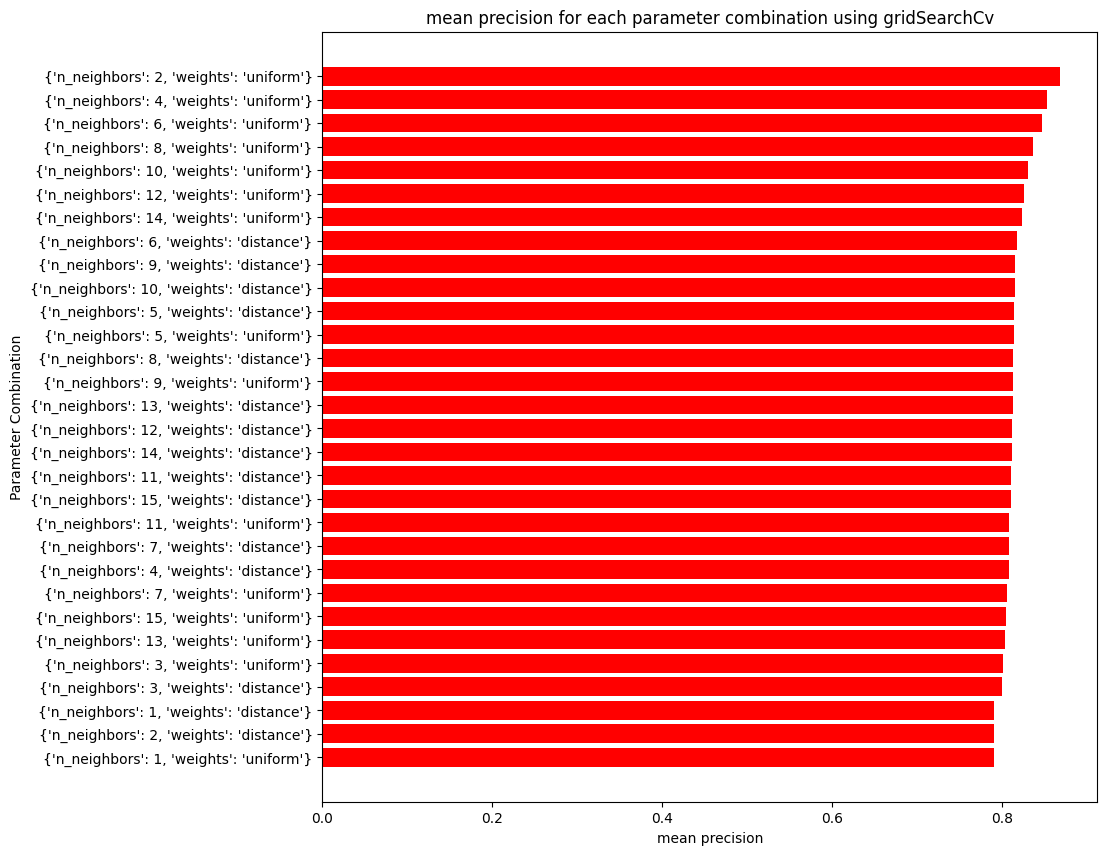

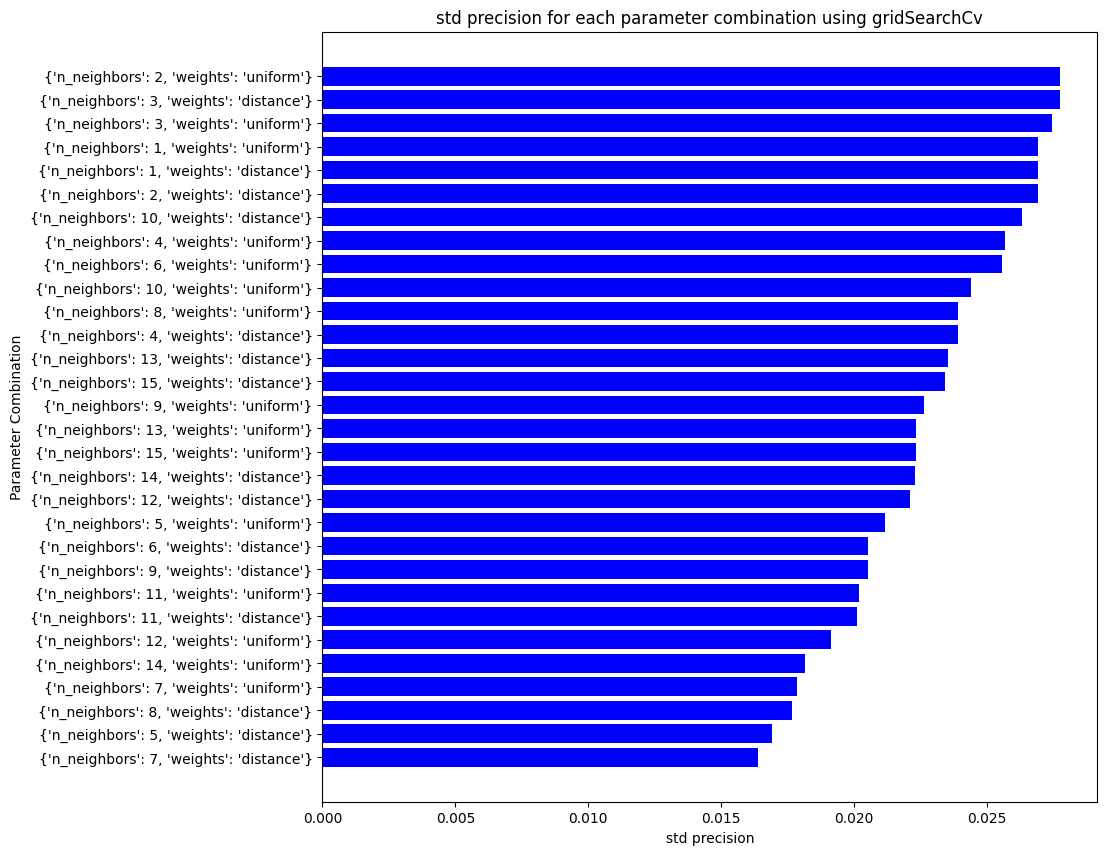

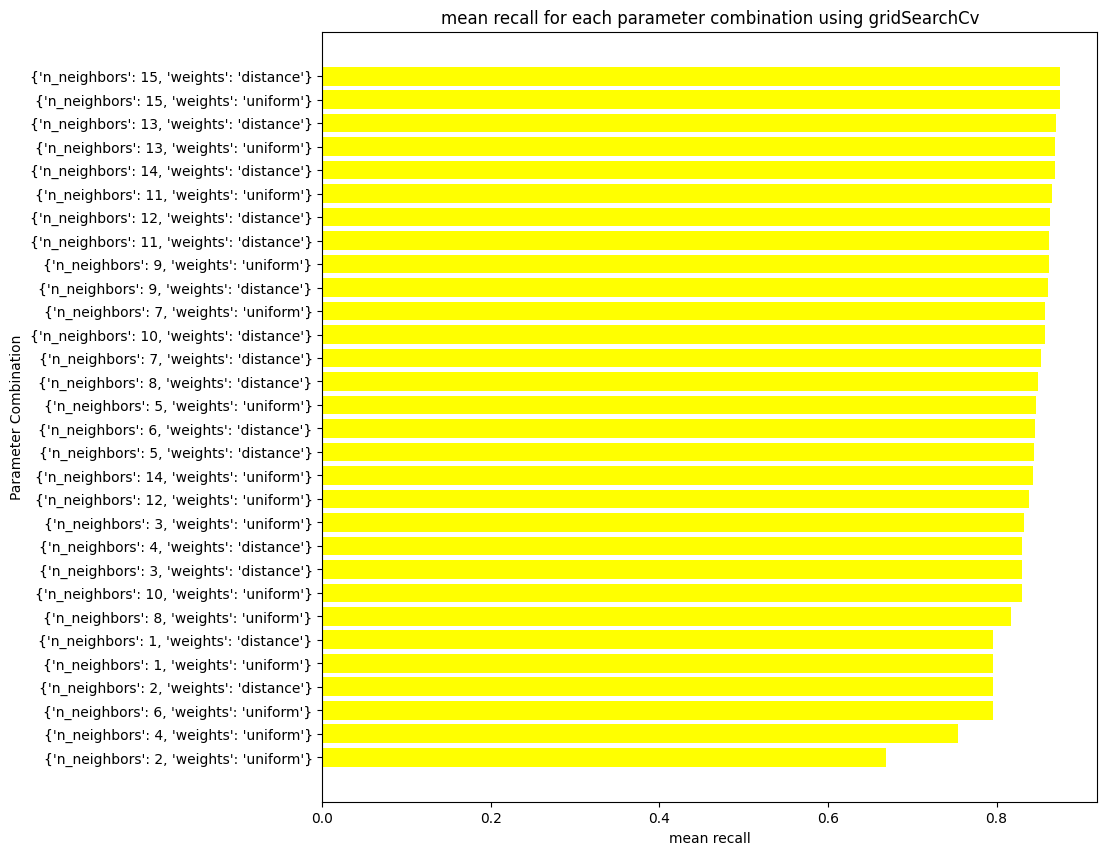

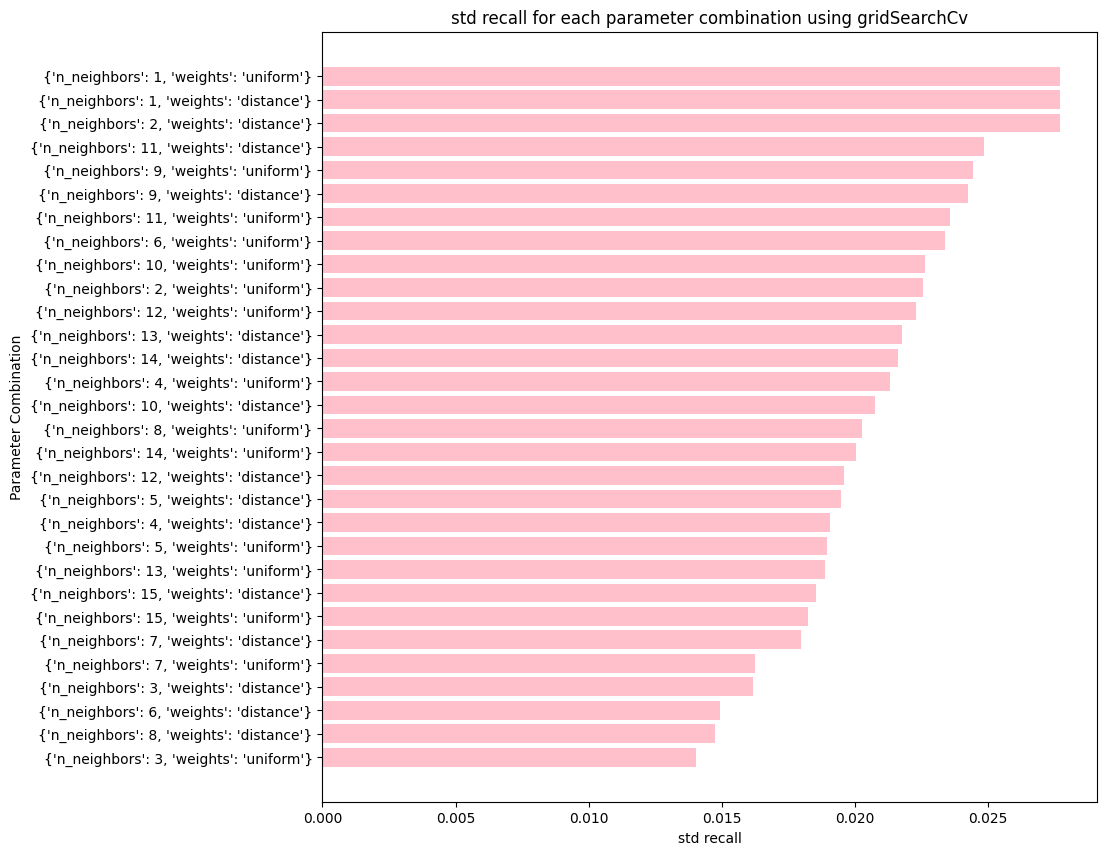

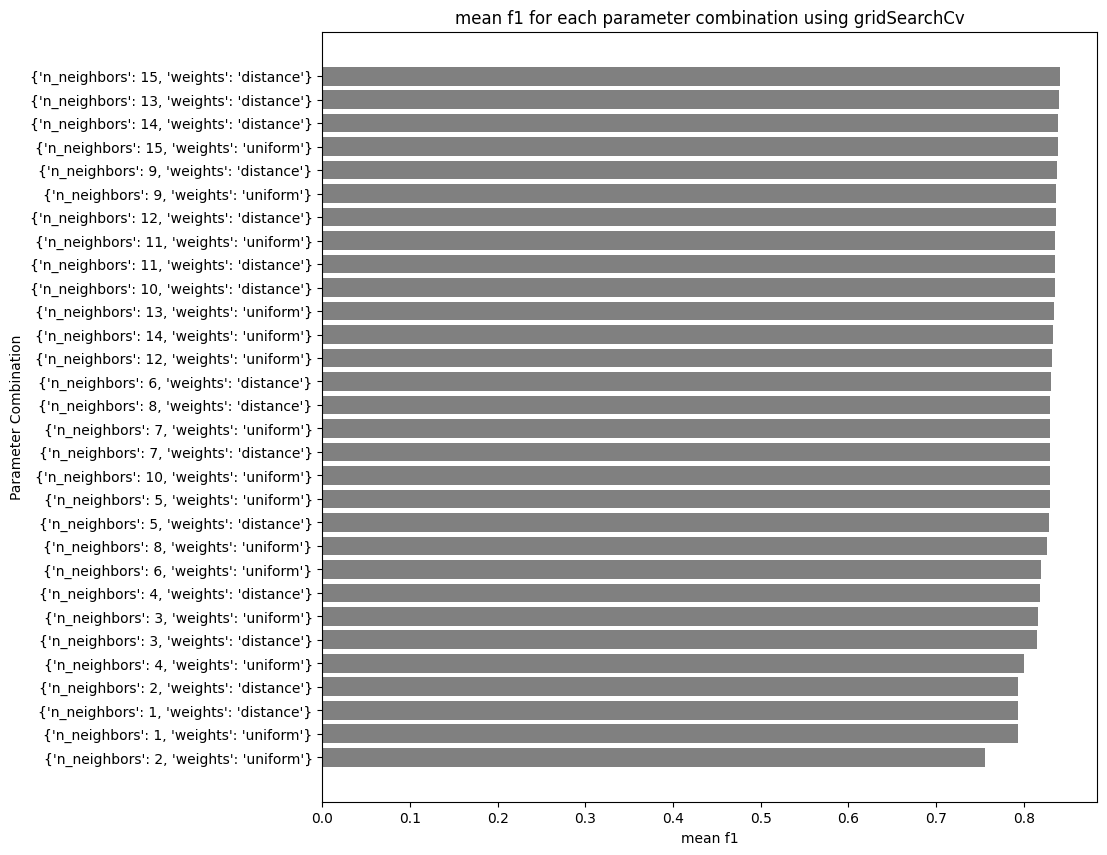

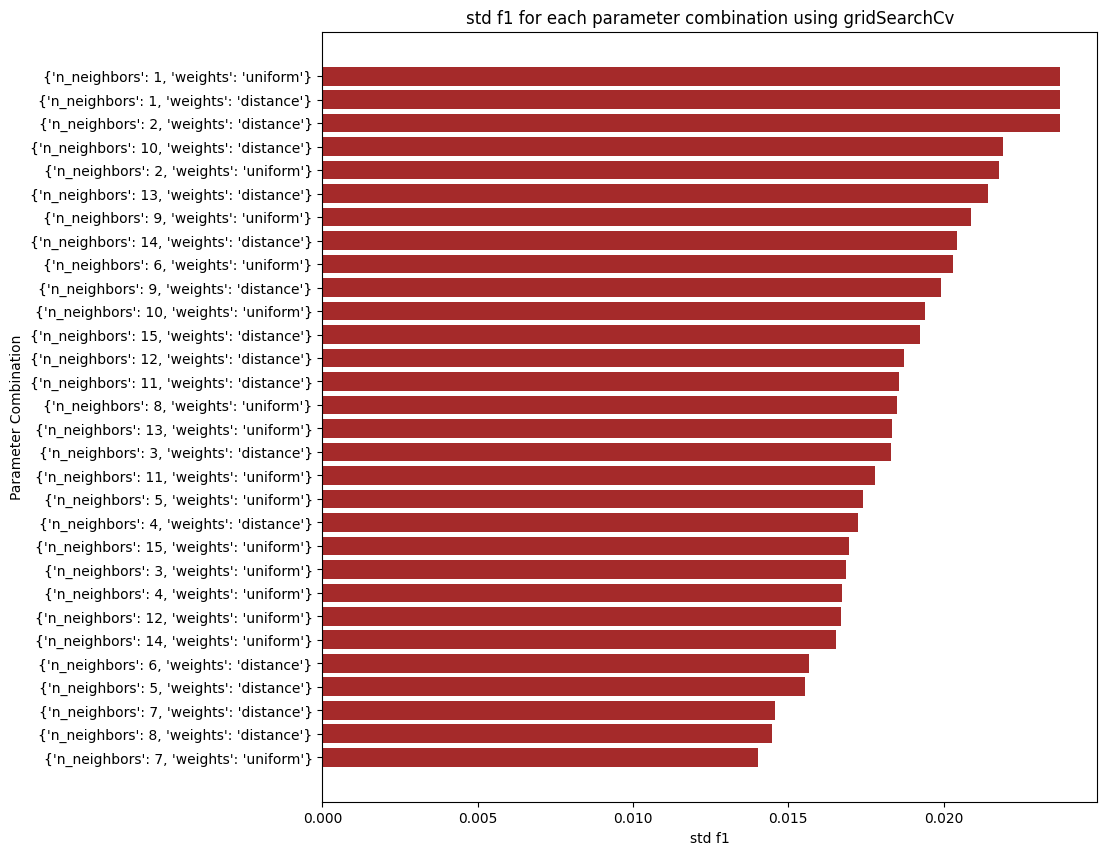

Graphiques à barres pour le decision_tree


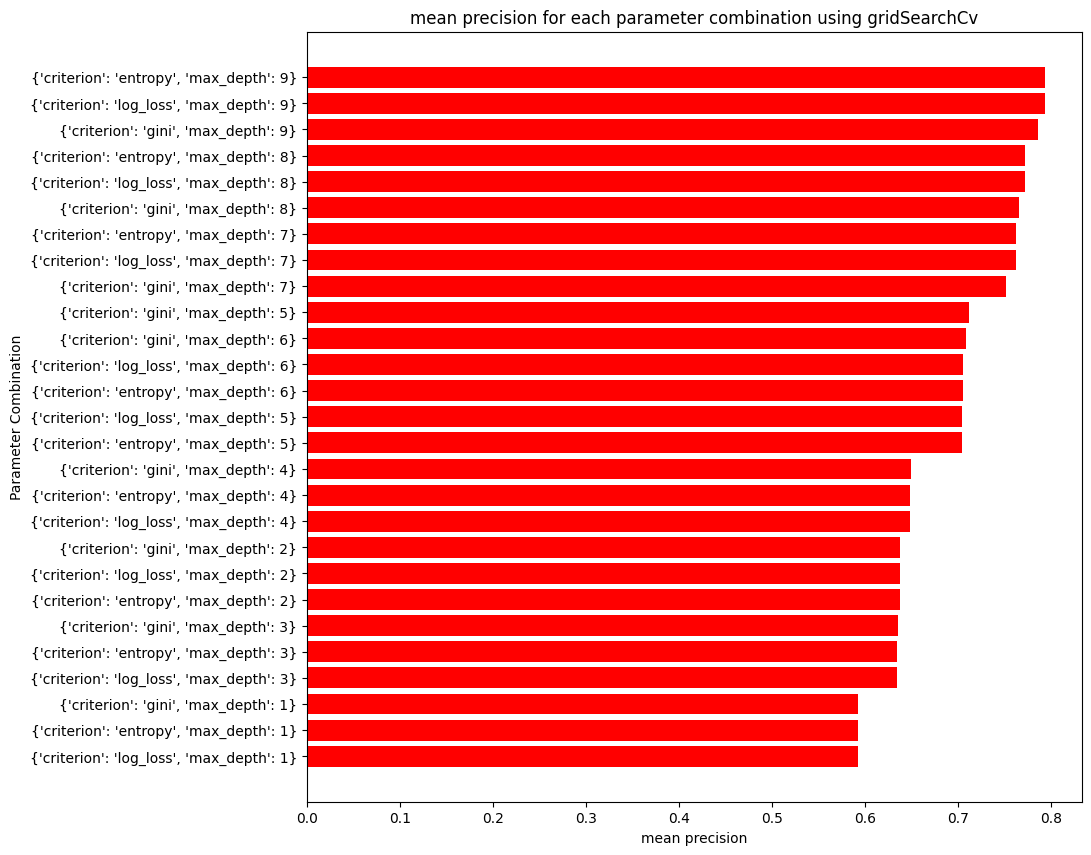

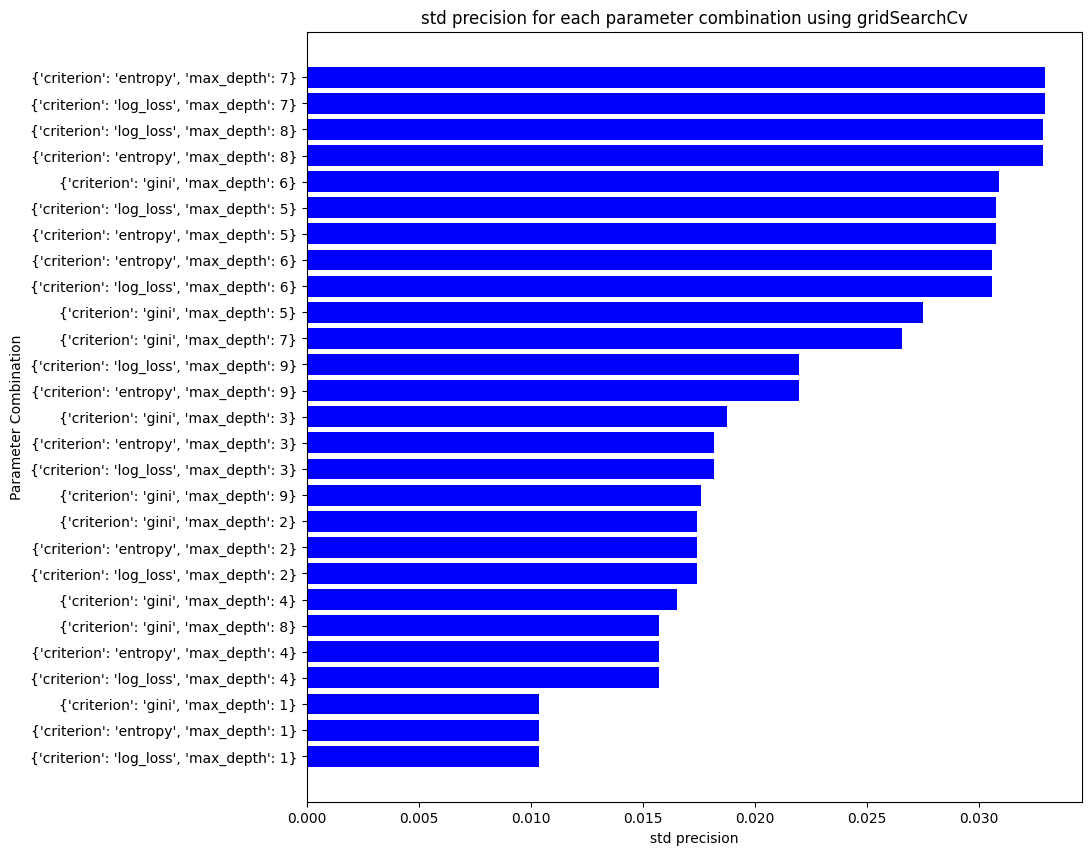

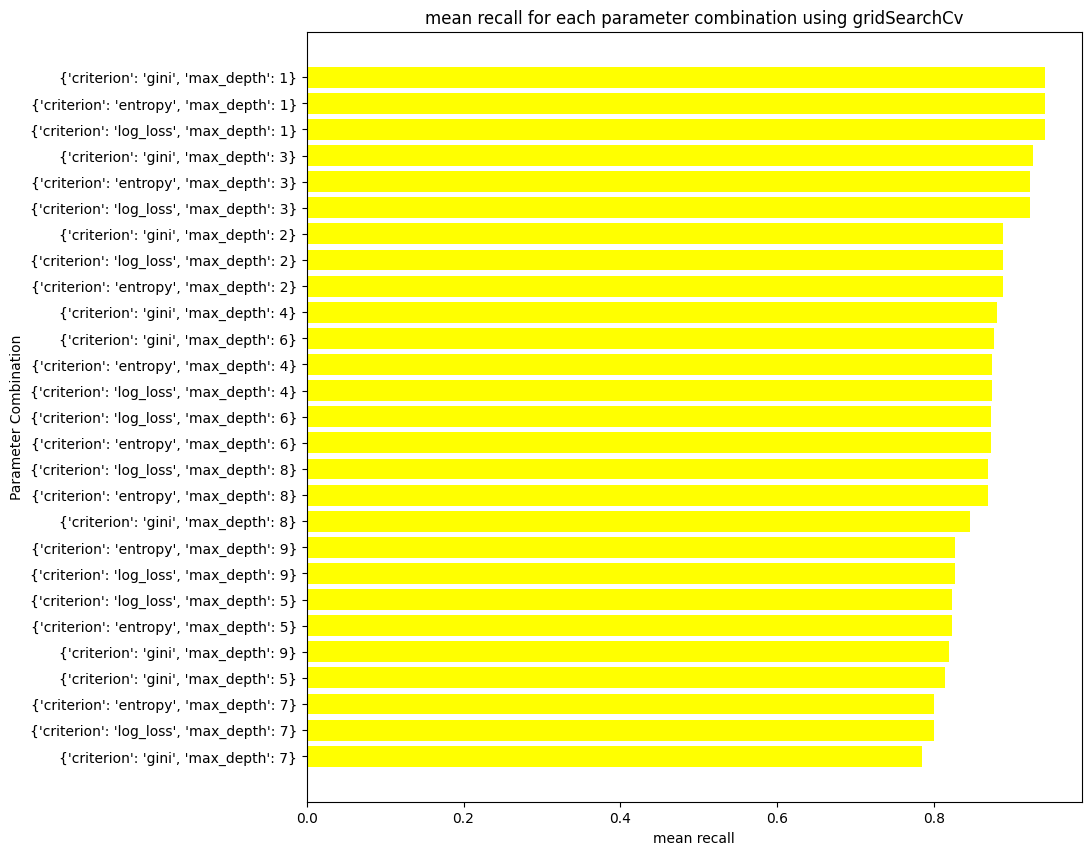

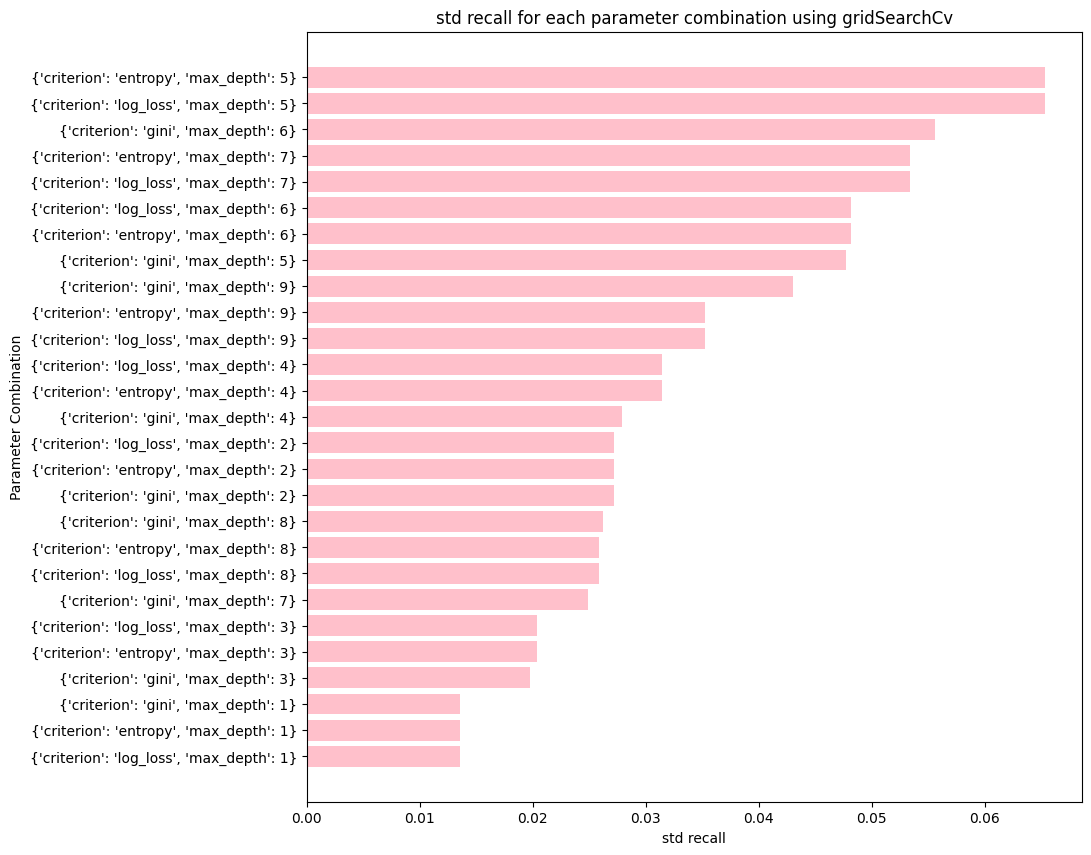

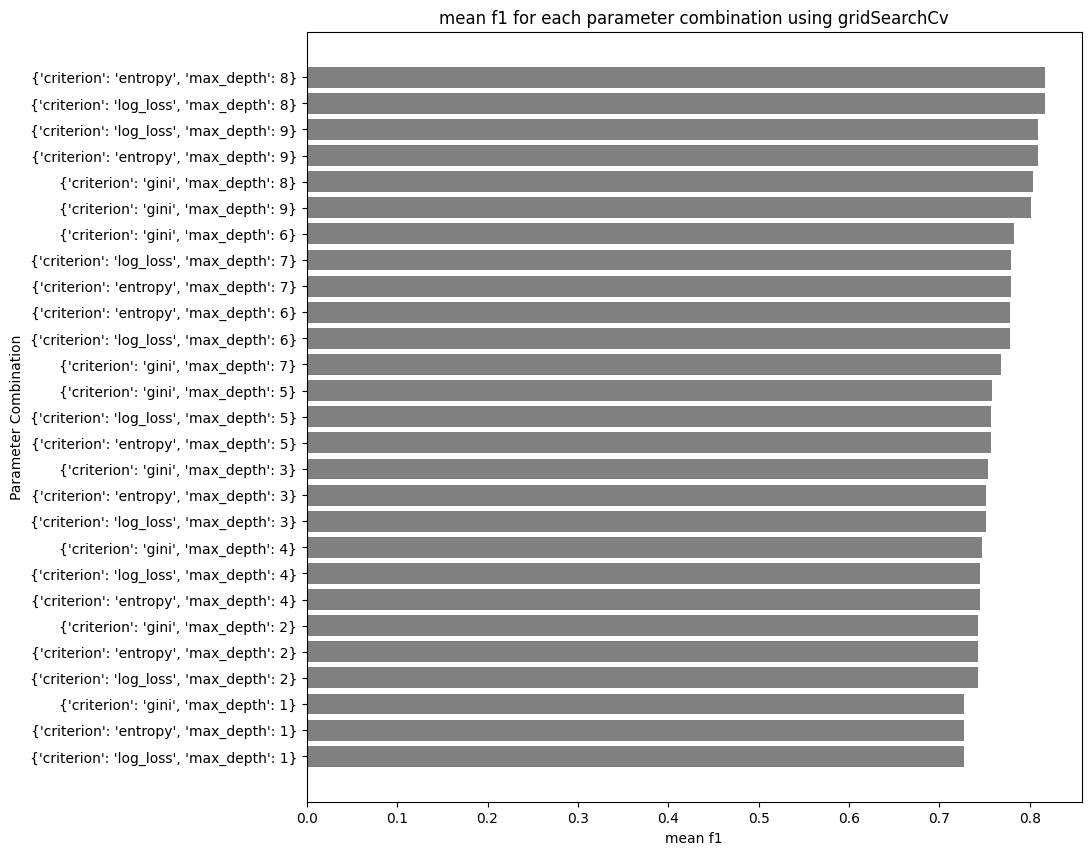

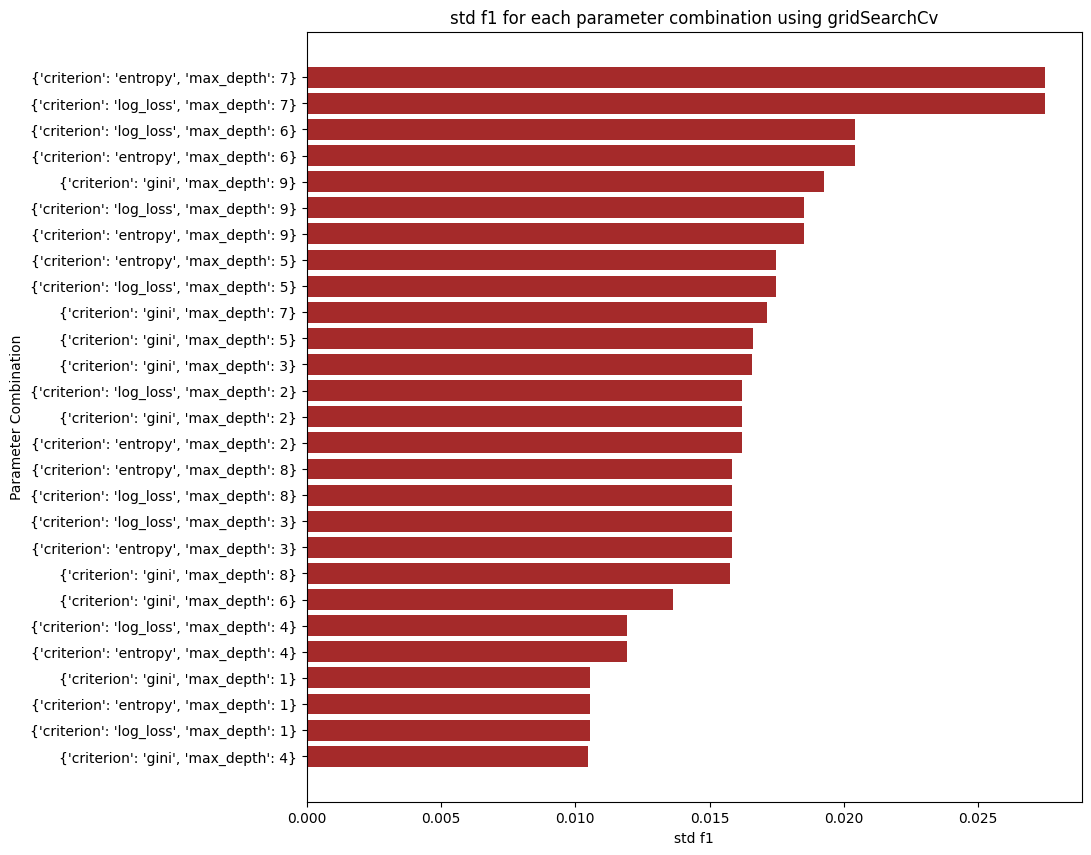

Graphiques à barres pour le logistic_regression


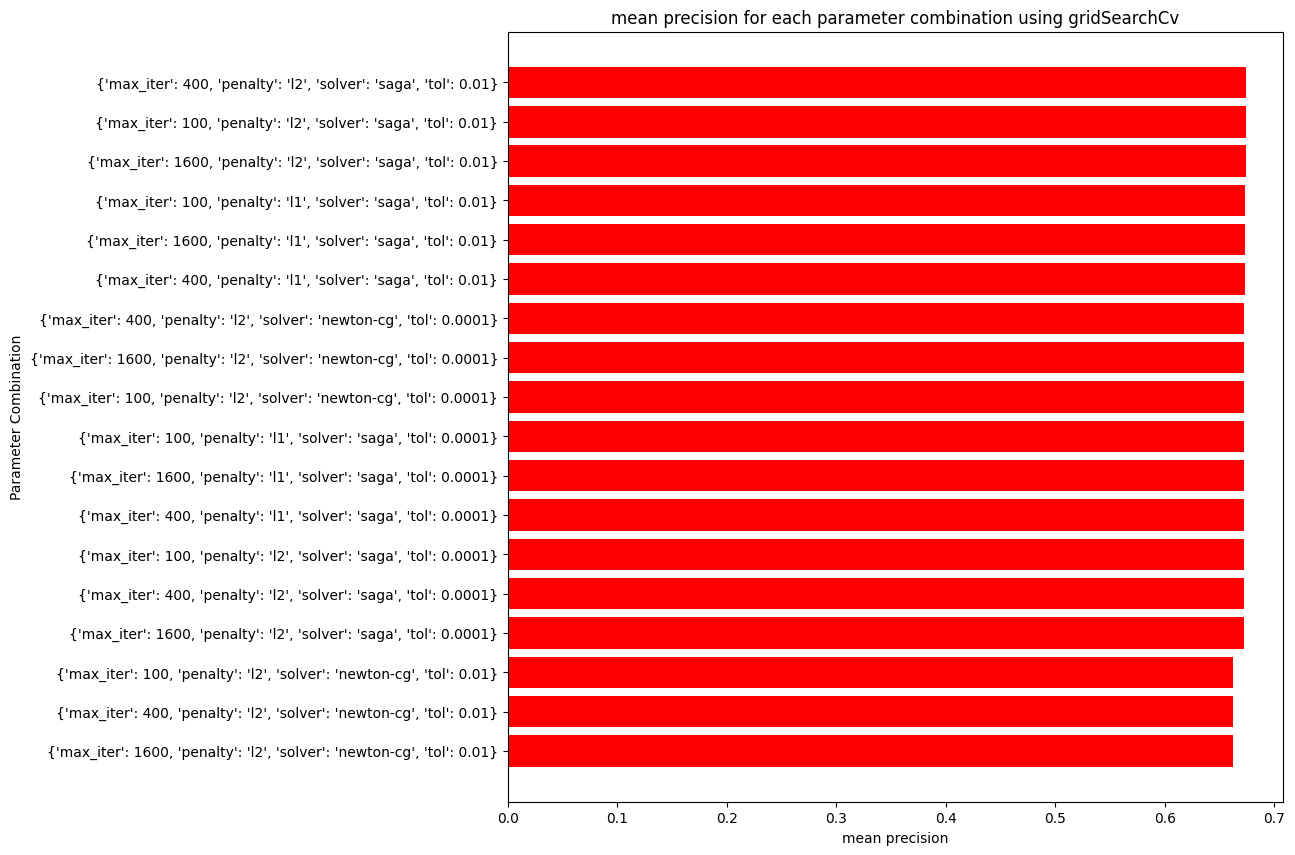

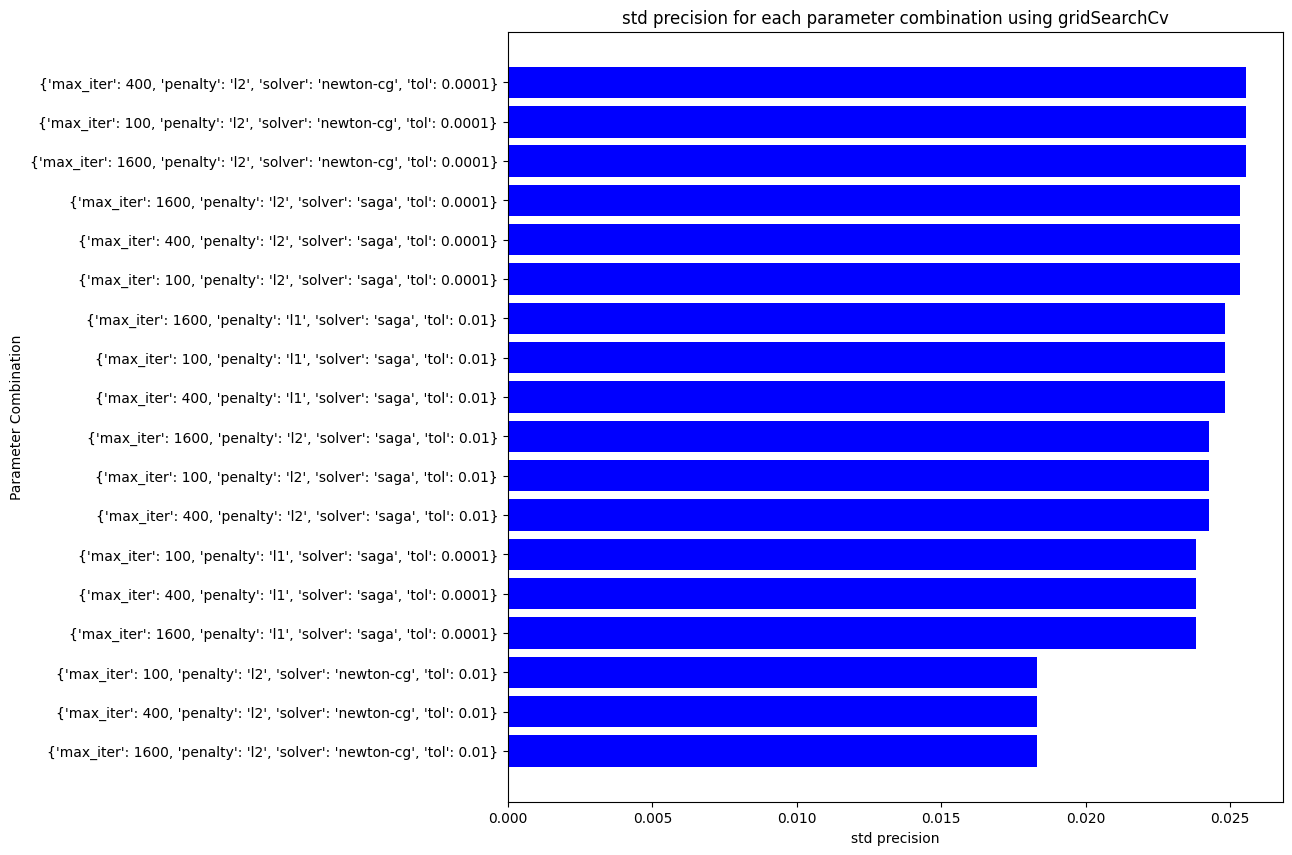

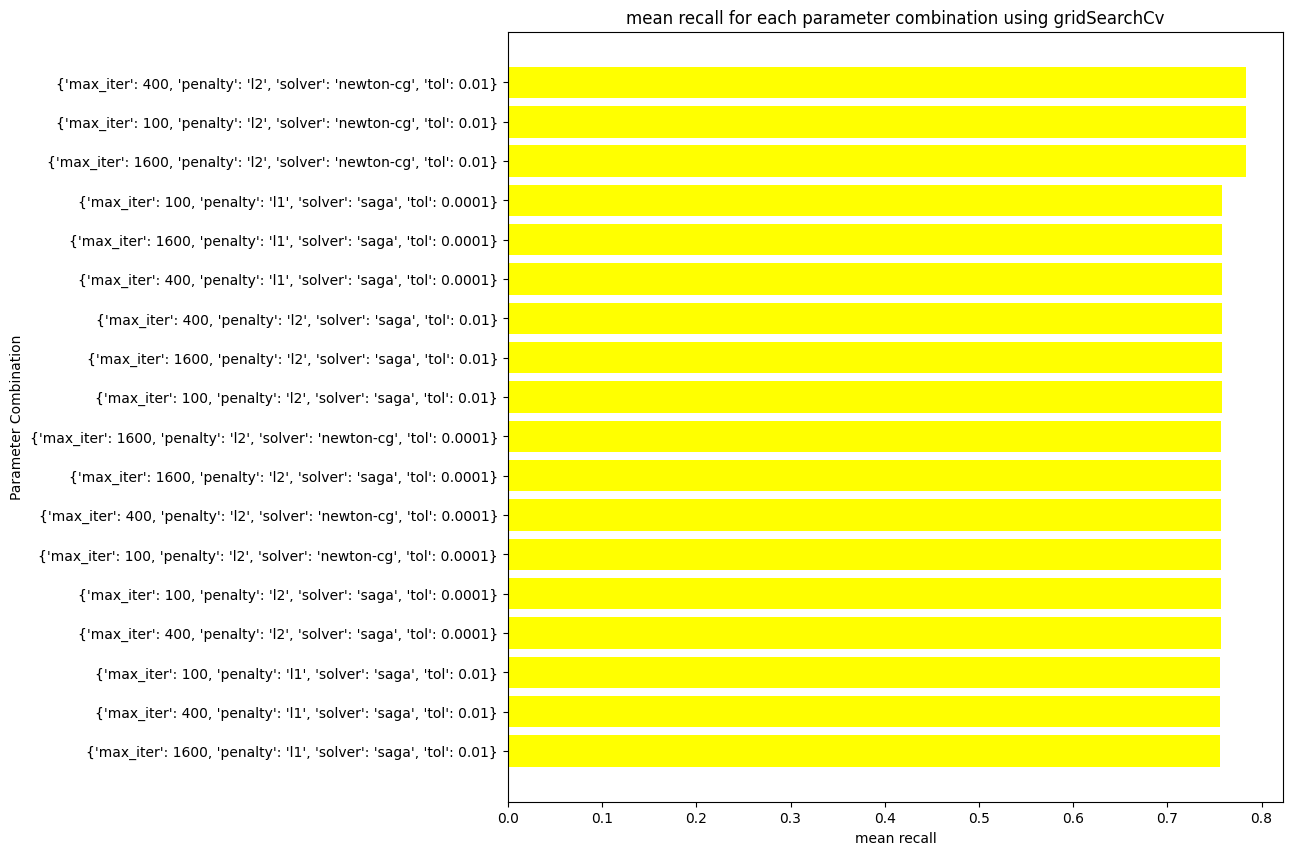

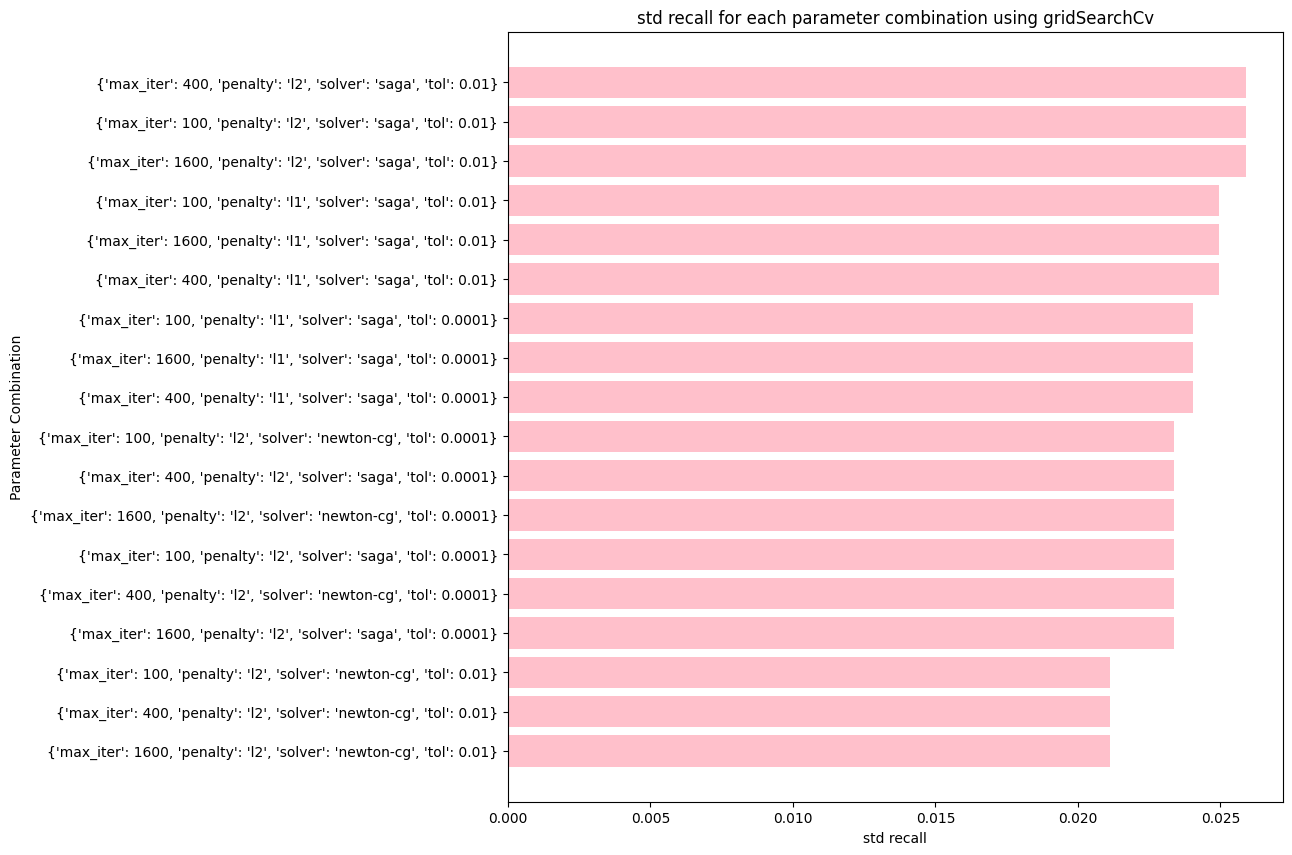

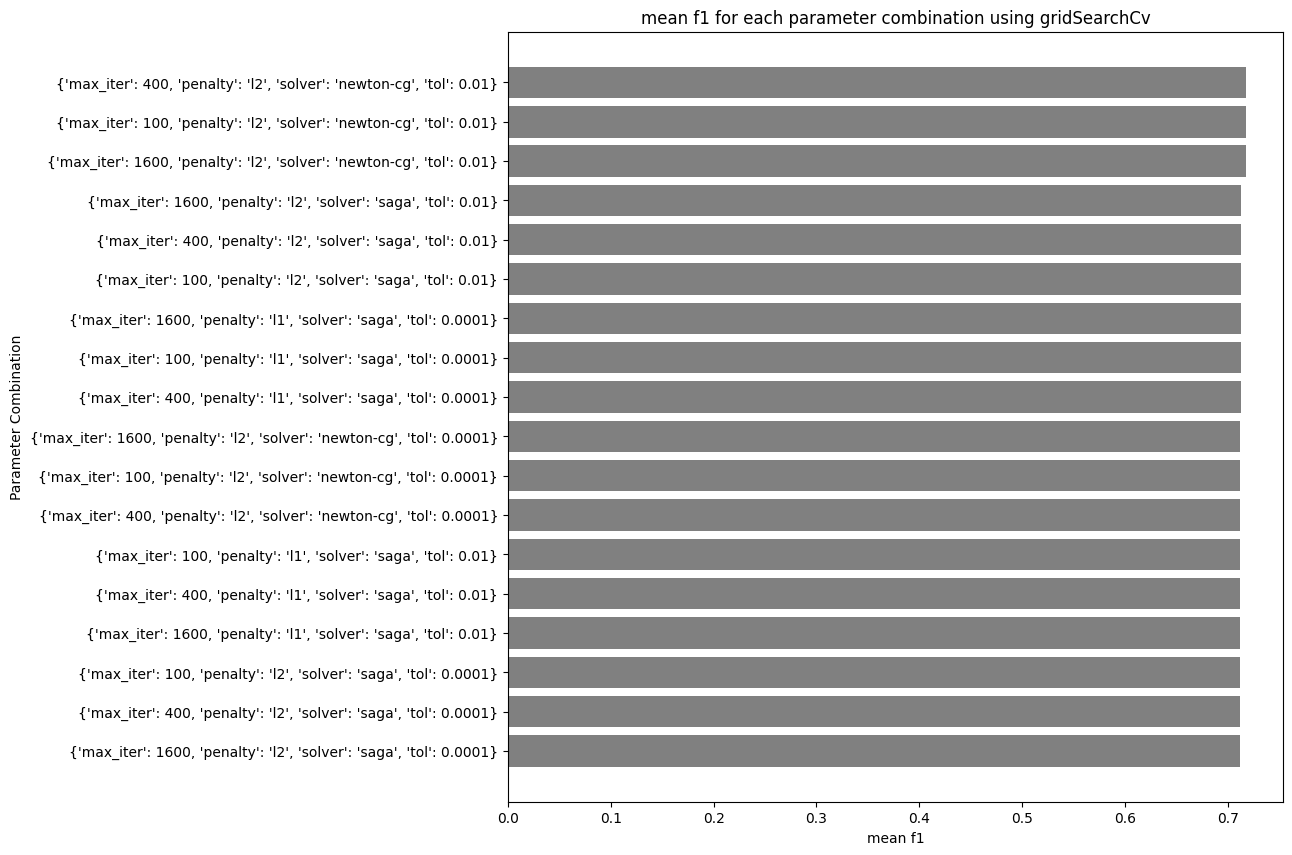

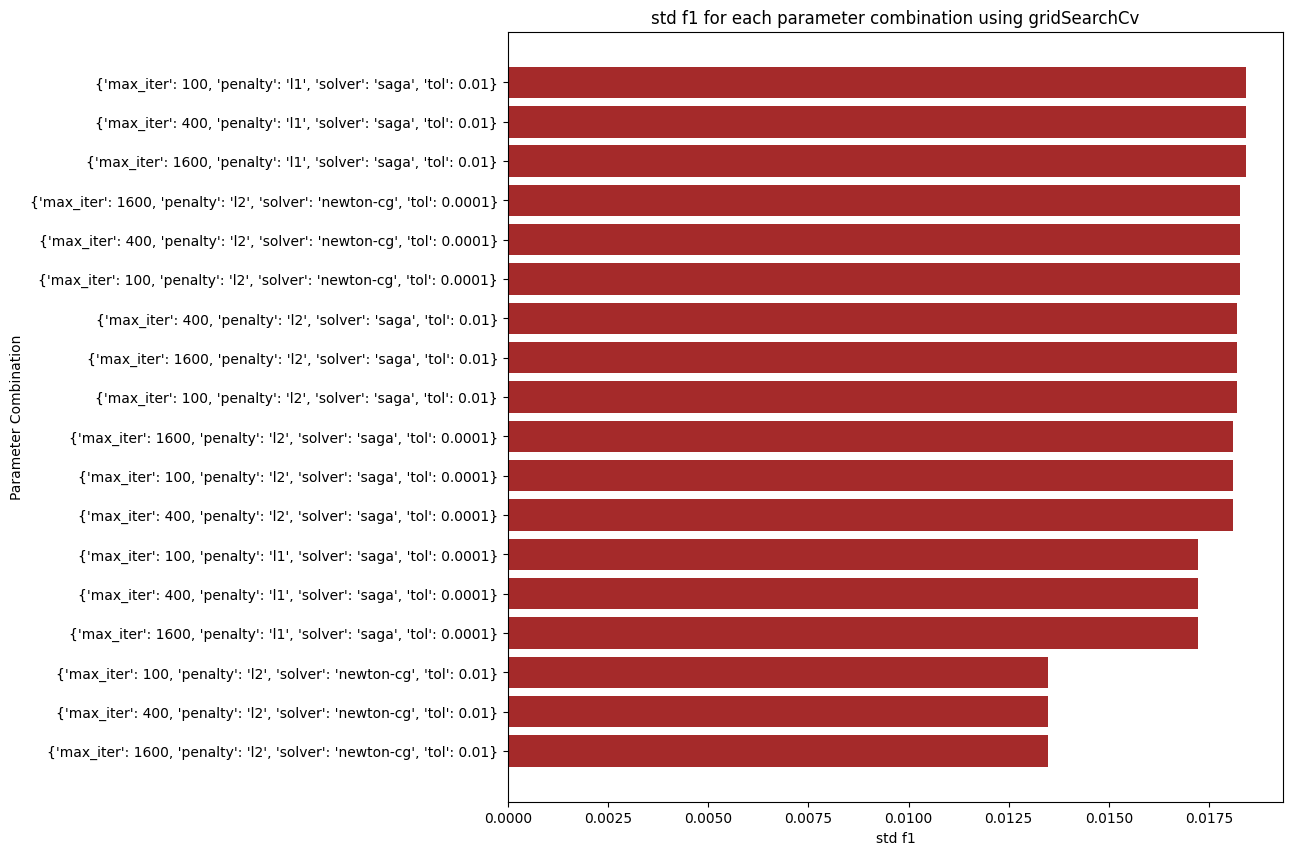

Graphiques à barres pour le random_Forest


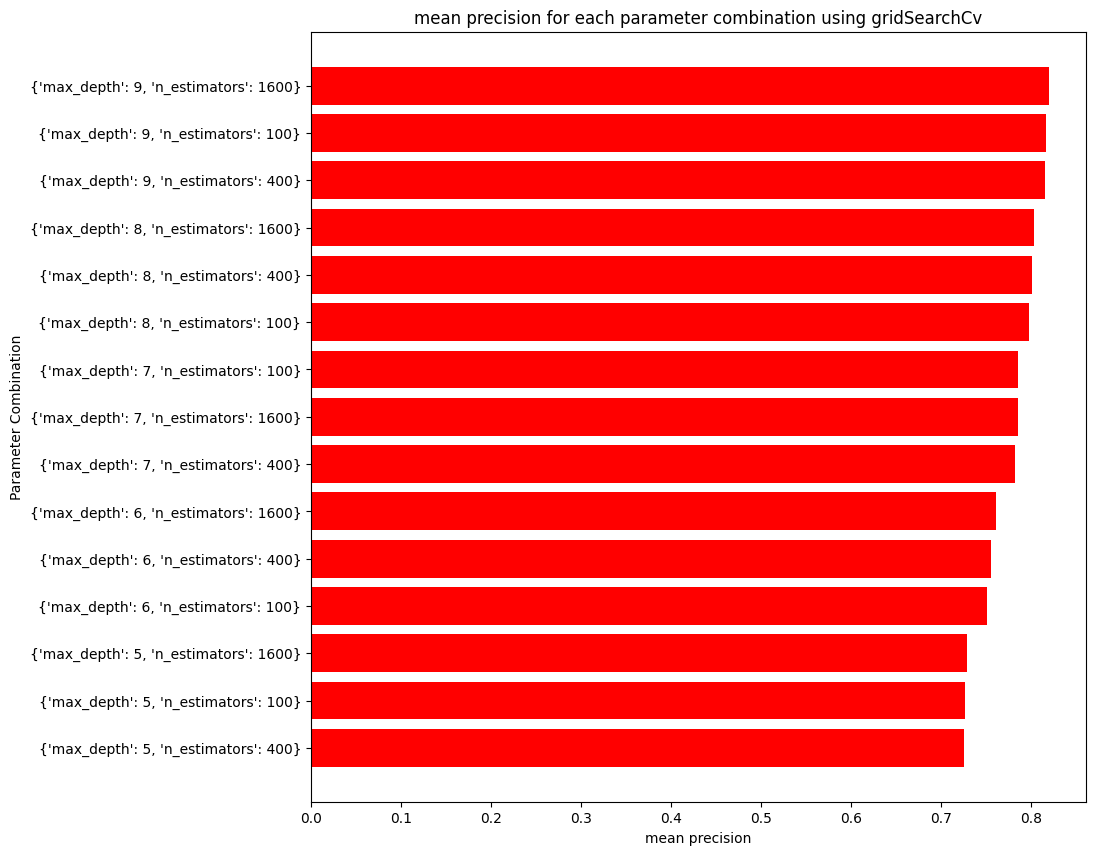

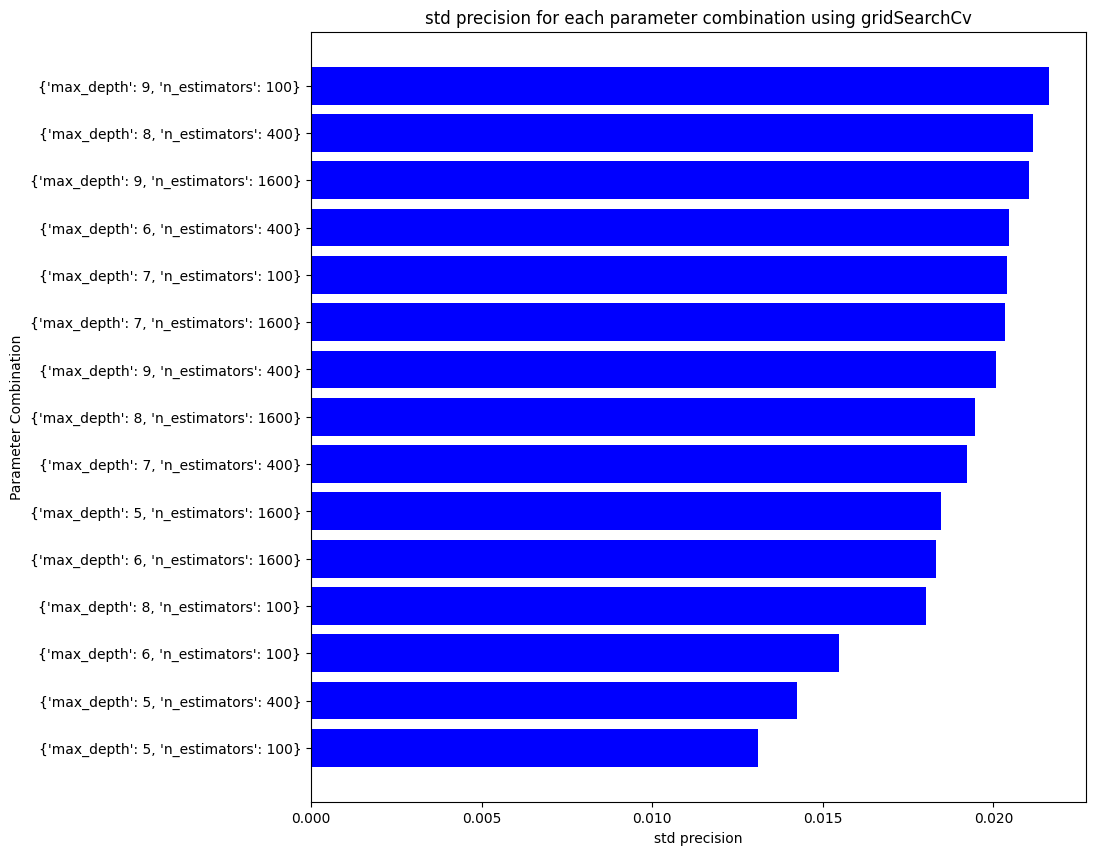

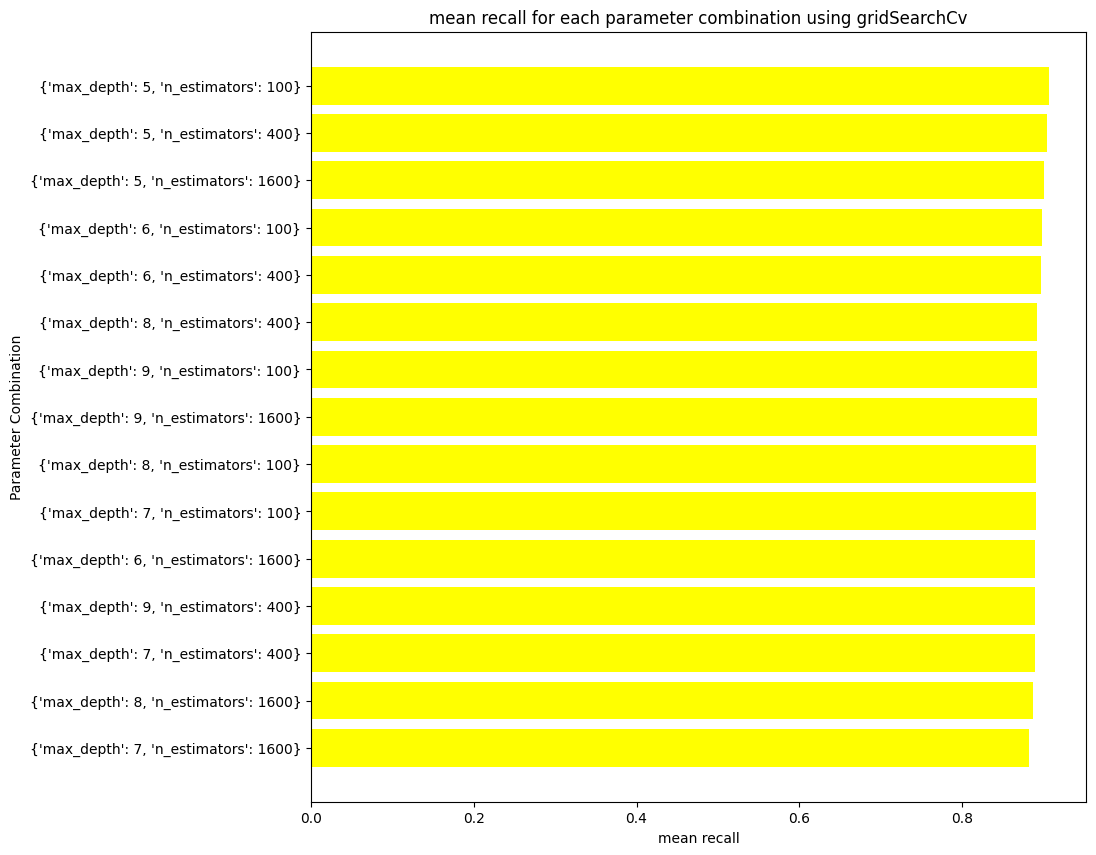

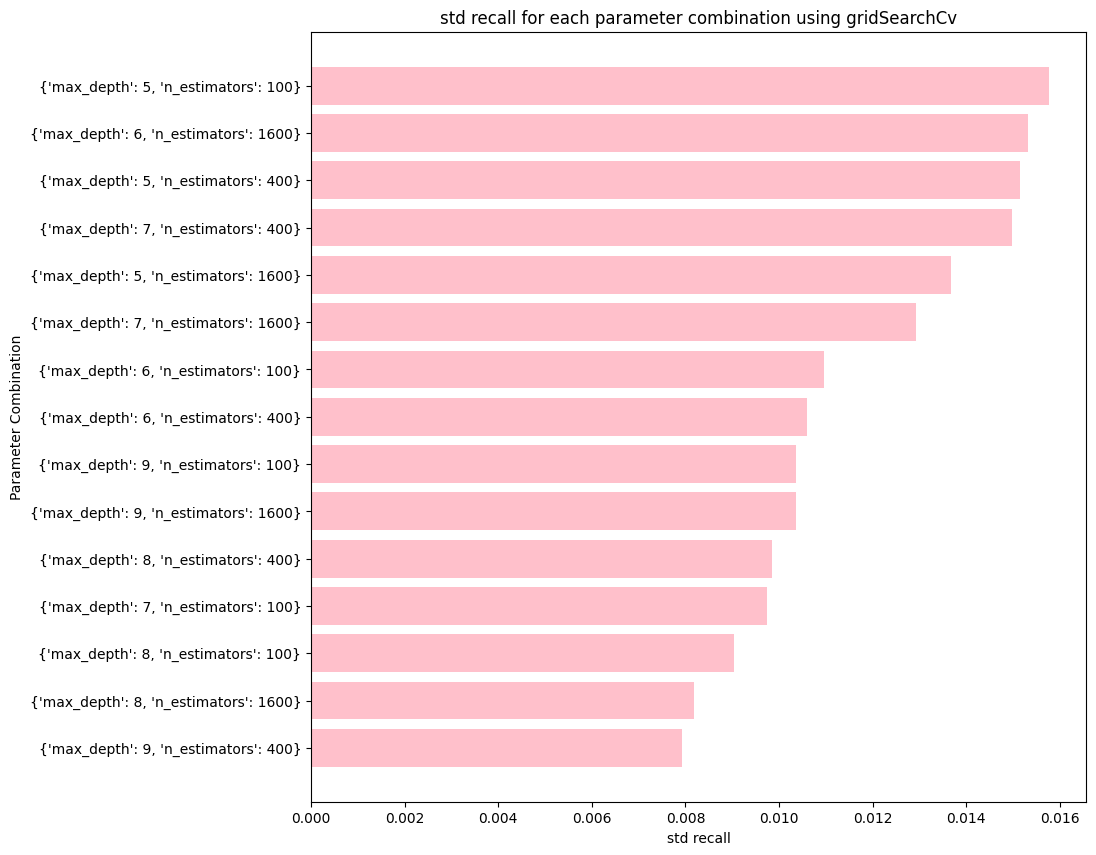

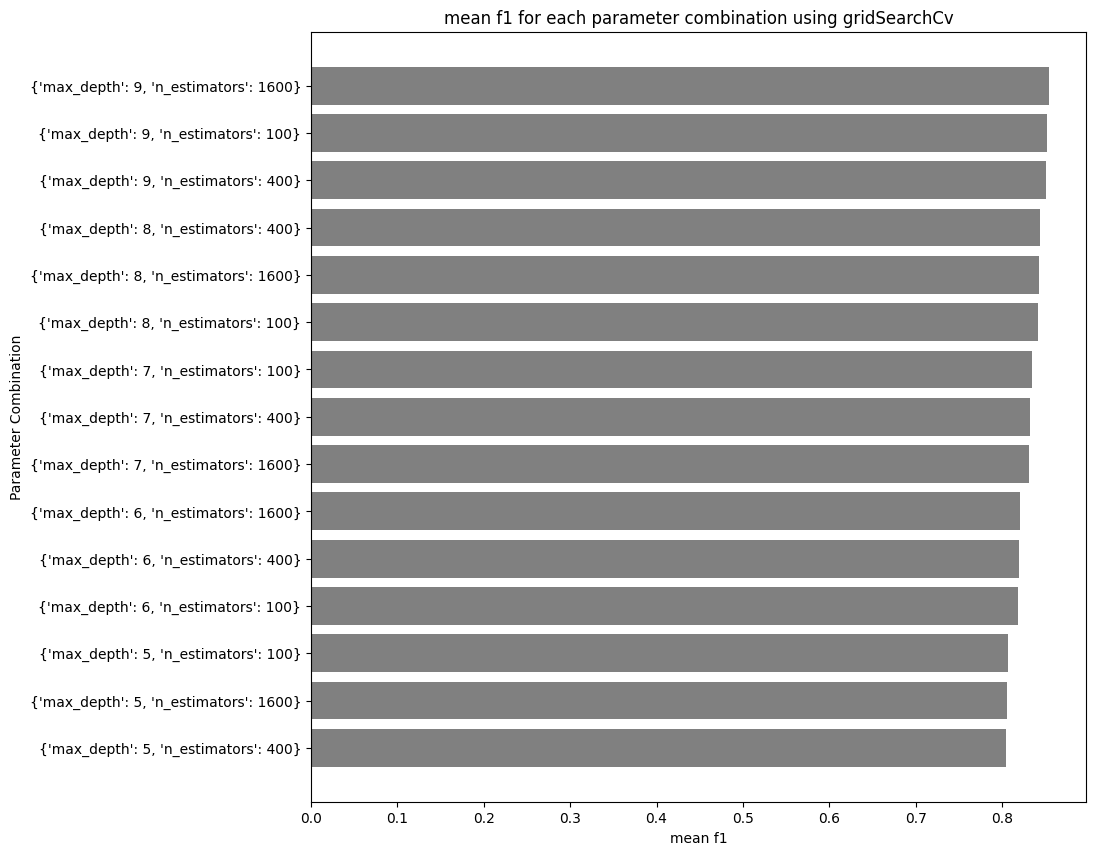

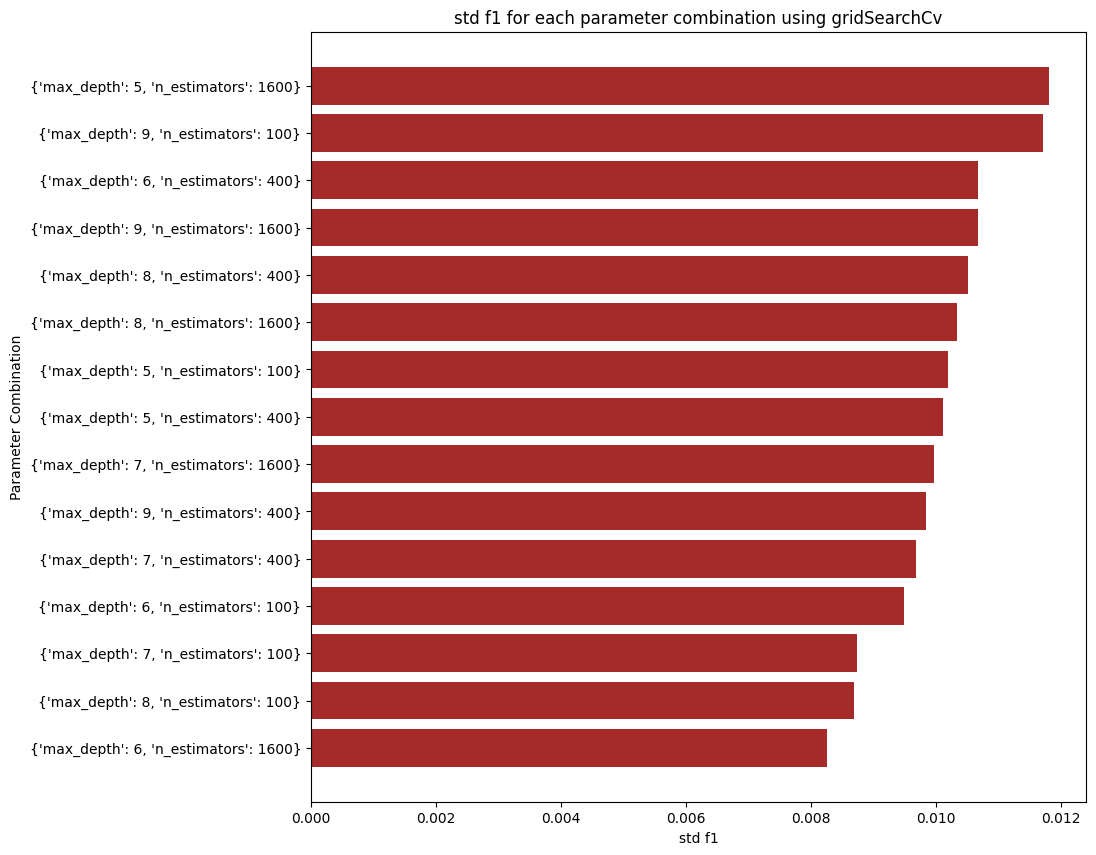

In [107]:
metrics = ['mean','std']
colors = ['red','blue','yellow','pink','gray','brown']

'''
draw_horizontal_bars(params,metric_values,x_label,color) draws the horizontal
bars when plotting the evolution of the specfied metric against different parameter
combinations.
'''
def draw_horizontal_bars(params,metric_values,x_label,color):
    plt.figure(figsize=(10,10))
    plt.barh(params,metric_values,color=color) # Ici la référence 4 avait été utilisé
    plt.xlabel(x_label)
    plt.ylabel('Parameter Combination')
    plt.title(x_label+' for each parameter combination using gridSearchCv')
    plt.gca().invert_yaxis()
    plt.show()

for grid in grids:
  print("Graphiques à barres pour le "+grid[1])
  result = pd.DataFrame(grid[0].cv_results_)
  result['parameter_combination'] = result['params'].apply(lambda x:str(x))
  index = 0;
  for score in scoring:#[precision,recall,f1] defines above
    for metric in metrics:# mean or standard deviation
      sorted_result = result.sort_values(metric+'_test_'+score,ascending=False)
      draw_horizontal_bars(sorted_result['parameter_combination'],sorted_result[metric+'_test_'+score],metric +' '+score,colors[index]);
      index+=1




**Réponse**


**KNN:**


Pour le KNN, on voit que la combinaison {'n_neighbors':2,'weights':'uniform'} a eu la precision maximale qui dépasse 0.8, ainsi que pour les combinaisons où les poids sont uniformes et que le 2<= n_neighbors <=14. Les précisions les plus petites ont été eu pour des combinaisons ou le n_neighbor est 1 et le poids est uniforme. Pour le rappel, la combinaison qui a pu le maximiser est: {n_neighbors:15,weights:distance}. Le score f1 connait une distribution plus égale, ses valeurs semblent être très proches dans la majorité des cas, mais la combinaison qui a pu le maximiser est: {n_neighbors:15,weights:distance}. Le score F1 prend en compte le compromis precision rappel, donc la meilleure combinaison pour knn est: **{n_neighbors:15,weights:distance}**. Sa déviation standard est au milieu, elle n'est ni maximale ni minimale et c'est aux alentours de 0.019.


**Decision_tree:**

Pour les arbres de décisions, on voit que les grandes profondeurs ont une plus grande précision quelque soit leurs criterion. La combinaison qui a pu maximiser cette précision est: {criterion:entropy,max_depth:9}. La déviation standard de la précision est aussi très variable. Par contre, le rappel maximum a pu être obtenu avec des profondeurs petites de 1 ou 3. La déviation standard pour le rappel est aussi assez variable. Le score f1 a été maximisé avec une combinaison: {criterion:entropy, max_depth:8}. Similairement a ce qui précède, la deviation standard de cette combinaison est au milieu aux alentours de 0.016.


**Logistic_regression**:

La régression logistique est interessante car la précision moyenne pour toutes les combinaisons est quasi constante et ne dépasse pas 0.7. La même tendance se remarque dans le rappel qui ne dépasse pas les 0.8. Le score f1 avait été maximisé grâce à la combinaison: {max_iter:400,penalty:l2,solver:newton-cg,tol:0.01} Par contre que les autres modeles, la déviation standard de ce score est presque minimale pour ce modèle aux alentours de 0.013.

**Random_forest:**

Pour le random forest, la précision moyenne est maximisé pour des grandes profondeurs, mais le rappel est maximisé avec des profondeurs de 5 ou 6. Le score f1 montre que {max_depth:9, n_estimators:1600} est la meilleure combinaison, sa déviation est élevée mais non risqué, aux lentours de 0.011.C'est en faite la plus petite par rapport aux toutes déviations avant.

### Analyse des résultats

(10) **Comparaison des modèles** :

- Comparer les résultats obtenus pour chaque modèle.

- Discuter des différences observées dans les performances des modèles, en fournissant des explications potentielles. Considérer des aspects tels que la complexité du modèle, le déséquilibre des données, le surapprentissage, et l'impact de l'ajustement des paramètres sur les résultats globaux.

- Fournir des recommandations sur le(s) modèle(s) à choisir pour cette tâche et justifier vos choix basés sur les résultats de l'analyse.

- Entraîner le(s) modèle(s) recommandé(s) en utilisant les valeurs de paramètres optimales identifiées lors de l'étape d'optimisation des paramètres. Appliquer ensuite le modèle entraîné aux données de test. Documenter vos observations de manière exhaustive. Évaluer spécifiquement si les résultats dérivés de la validation croisée sont cohérents avec ceux obtenus à partir de l'ensemble de test.

**Réponse**

Pour knn, la meilleure combinaison a eu un score de f1 ~ 0.83.  L'écart-type était de 0.019.

Pour les arbres de décision, la meilleure combinaison a eu un score de f1 ~ 0.8. La déviation standard est de: 0.016

Pour la régression logistique, la meilleure combinaison a eu un score de f1 ~ 0.73. La déviation standard est de 0.013.

Pour les forêts aléatoires, la meilleure combinaion a eu un score de f1 ~ 0.83. La déviation standard est de 0.011.


KNN et les forêts aléatoires sont comparables, mais les forêts aléatoires sont meilleurs car  leur déviation standard est plus petite. Les arbres de décision ont aussi une bonne performance; Il n'y a pas de débalancement de classes dans notre cas, les deux classes ont à peu près la même cardinalité. C'est la raison pour laquelle la performance des arbres de décision était bonne.

La régression logistique a eu étrangement une faible performance même si c'est un problème de classification binaire. Ceci peut être à cause des relations non linéaires qui existent entre les données que la régression logistique ne peut pas comprendre. Il y avait également la présence de quelques valeurs aberrantes pour certains attributs donc ceci pourrait également avoir joué un rôle car le modèle est en train de surapprendre.

Pour cette tâche, je choisirai les forêts aléatoires, elles ont eu une bonne performance et leur écart type est le plus petit donc elles auront plus de chances lors de la phase de validation.

In [108]:
newly_trained_model = RandomForestClassifier(max_depth=9,n_estimators=1600,random_state=43)  # best configuration

newly_trained_model.fit(X_clean_train_processed,y_clean_train)

y_pred = newly_trained_model.predict(column_transformer.transform(X_clean_test))

accuracy = accuracy_score(y_clean_test,y_pred)

report = classification_report(y_clean_test,y_pred)

print("Après entraînement des forêts aléatoires, le rapport des métriques est: ")

print(report)



Après entraînement des forêts aléatoires, le rapport des métriques est: 
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       491
           1       0.82      0.88      0.85       509

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000



**Réponse**

D'après ce qui précéde, les résultats de la validation croisée sont compatibles avec les résultats obtenus sur les données de test. Le score f1 est aux alentours de 0.83 ce qui a été déjà prouvé par la validation croisée.

### Gestion des données manquantes

(11) **Évaluer comment les valeurs manquantes affectent les performances du modèle :**

- Lire le fichier CSV avec des données manquantes (`alien_pet_health-realism-clean-missing.csv`).

- Présenter une brève analyse des données manquantes dans le jeu de données en rapportant à la fois le nombre et le pourcentage de valeurs manquantes pour chaque colonne ainsi que pour l'ensemble du jeu de données. Fournir également une répartition du nombre et de la proportion de lignes classées par absence de données manquantes, et celles contenant une, deux ou plus de valeurs manquantes.

- Appliquer une stratégie d'imputation simple (par exemple, médiane pour les numériques, et la plus fréquente pour les catégorielles).

- Standardiser et normaliser les attributs numériques, et encoder les données catégorielles en utilisant les méthodes de prétraitement des données précédemment décrites.

- Utiliser la validation croisée pour évaluer l'efficacité de la stratégie d'imputation des données, étant donné que la combinaison optimale d'algorithmes d'apprentissage et d'hyperparamètres a déjà été déterminée.

- Discuter des différences observées dans les performances.

In [109]:
# Code Python
from sklearn.impute import SimpleImputer

# lecture du fichier


df_missing = pd.read_csv('https://raw.githubusercontent.com/turcotte/csi4106-f25/main/assignments-data/a2/alien_pet_health-realism-clean-missing.csv')

# Brève analyse des données manquantes
# print(df_missing)
print("sommaire des valeurs manquantes avant imputation")

missing_values_before = df_missing.isnull().sum().to_frame(name='count_missing')
missing_values_before['percentage_missing'] = df_missing.isnull().mean()*100
print(missing_values_before)

# Imputation [inspire de la reference [5]]
numerical_attributes = ['thermoreg_reading','enzyme_activity_index','dual_lobe_signal','stress_variability']
categorical_attributes = ['habitat_zone','activity_score','fasting_flag']

imputer_num = SimpleImputer(strategy="median")
df_missing[numerical_attributes] = imputer_num.fit_transform(df_missing[numerical_attributes])
imputer_cat = SimpleImputer(strategy="most_frequent")
df_missing[categorical_attributes] = imputer_cat.fit_transform(df_missing[categorical_attributes])

print("sommaire des valeurs manquantes après imputation")

missing_values_after = df_missing.isnull().sum().to_frame(name='count_missing')
missing_values_after['percentage_missing'] = df_missing.isnull().mean()*100
print(missing_values_after)

# Standardisation et normalisation des attributs
X_test_missing_standardized = column_transformer.transform(df_missing[numerical_attributes+categorical_attributes])
precision_recall_f1_scores_missing = cross_validate(newly_trained_model, X_test_missing_standardized, df_missing['health_outcome'], cv=10,scoring=scoring)

print(f"Pour l'ensemble de donnees impute, La moyenne de la precision est: {precision_recall_f1_scores_missing['test_precision'].mean():.2f}, son ecart type est: {precision_recall_f1_scores_missing['test_precision'].std():.2f}")
print(f"La moyenne du rappel est: {precision_recall_f1_scores_missing['test_recall'].mean():.2f}, son ecart type est: {precision_recall_f1_scores_missing['test_recall'].std():.2f}")
print(f"La moyenne du f1 score est: {precision_recall_f1_scores_missing['test_f1'].mean():.2f},son ecart type est: {precision_recall_f1_scores_missing['test_f1'].std():.2f}")






sommaire des valeurs manquantes avant imputation
                       count_missing  percentage_missing
thermoreg_reading                231                4.62
enzyme_activity_index            108                2.16
dual_lobe_signal                 110                2.20
stress_variability                93                1.86
habitat_zone                      87                1.74
activity_score                   100                2.00
fasting_flag                     595               11.90
health_outcome                     0                0.00
sommaire des valeurs manquantes après imputation
                       count_missing  percentage_missing
thermoreg_reading                  0                 0.0
enzyme_activity_index              0                 0.0
dual_lobe_signal                   0                 0.0
stress_variability                 0                 0.0
habitat_zone                       0                 0.0
activity_score                     0           

Il n'y a pas une énorme différence entre ce qui a été prédi et ces résultats, donc la phase de l'imputation a bien fonctionné.

### Explicabilité du modèle (Optionnel)

L'explicabilité dans l'apprentissage automatique se réfère à la capacité de comprendre et d'interpréter les décisions prises par un modèle. Les valeurs SHAP (SHapley Additive exPlanations) fournissent une mesure unifiée pour expliquer la contribution de chaque attribut à la prédiction du modèle, offrant des perspectives sur comment et pourquoi un modèle fait des prédictions spécifiques, renforçant ainsi la transparence et la confiance dans les modèles complexes.

Cette question est optionnelle. Vous pouvez choisir de l'aborder si vous souhaitez explorer le sujet ou si vous cherchez à obtenir des points supplémentaires.

(12) **Importance des attributs :**

- Avec les hyperparamètres déjà optimisés, calculer les valeurs [SHAP](https://shap.readthedocs.io/en/latest/index.html) (SHapley Additive exPlanations) pour évaluer l'importance des attributs pour les modèles K-Nearest Neighbors (KNN), Arbres de Décision, et Régression Logistique. Pour chaque modèle, produire un graphique récapitulatif qui identifie et met en avant les cinq attributs les plus influents utilisées lors de l'étape de classification.

In [110]:
# Code Python

# Références

Dans le code, sous forme de commentaires, j'ai mentionné où ces sources avait été utilisé

- [1] Discussion avec ChatGpt 4:

**You said**:
what does scipy python lib do <br/>

**ChatGPT said**:
<br/>
The SciPy library in Python is a powerful open-source library used for scientific and technical computing. It builds on NumPy and provides a wide range of functions for mathematics, science, and engineering tasks.

Here’s a breakdown of what SciPy does and what it’s used for 👇

🧮 Core Idea
SciPy extends NumPy’s array capabilities by adding high-level functions for things like:

optimization,

integration,

interpolation,

signal and image processing,

linear algebra,

and statistical analysis.

You can think of it as a toolbox for scientific calculations.

🧰 Main SciPy Modules & What They Do
Module	Purpose
scipy.optimize	Optimization (e.g., finding minima/maxima, curve fitting, root finding)
scipy.integrate	Numerical integration (solving definite integrals or differential equations)
scipy.interpolate	Data interpolation (e.g., filling in missing data points)
scipy.linalg	Advanced linear algebra (matrix decompositions, solving systems)
scipy.fft	Fast Fourier Transforms (signal analysis)
scipy.signal	Signal processing (filters, convolutions, spectral analysis)
scipy.sparse	Working with sparse matrices (efficient memory use for large datasets)
scipy.stats	Probability distributions and statistical functions
scipy.spatial	Spatial data structures (KD-trees, distance calculations, clustering)
scipy.ndimage	Image processing (filtering, morphology, measurements)
⚙️ Example Uses
Here are some simple examples:

1. Optimization (finding the minimum of a function)
from scipy.optimize import minimize

def f(x):
    return x**2 + 10*np.sin(x)

result = minimize(f, x0=0)
print(result.x)  # x value that minimizes f(x)
2. Integration
from scipy.integrate import quad

result, error = quad(lambda x: x**2, 0, 2)
print(result)  # ∫₀² x² dx = 8/3
3. Statistics
from scipy import stats

data = [2.3, 3.1, 4.7, 3.9, 5.2]
mean = stats.tmean(data)
std_dev = stats.tstd(data)
print(mean, std_dev)
🧠 Summary
SciPy = “Scientific Python”
It’s what turns Python from a basic programming language into a powerful tool for engineers, data scientists, and researchers.

Would you like me to give examples of how it differs from NumPy (since they’re often used together)?

**You said:**<br/>
say I have histograms, can scipy give me description of the distribution

**ChatGPT said:**<br/>
Yes — SciPy can absolutely help you describe and analyze the distribution behind your histogram data.

Here’s how it works 👇

🧮 1. From Histogram → Distribution Description
If you already have histogram data (like bin counts and edges), SciPy can:

Estimate what distribution fits your data best (normal, exponential, etc.)

Compute mean, variance, skewness, kurtosis

Compare how well a theoretical distribution matches your data

🧰 Example: Describing a Distribution
Let’s say you have some histogram data from observations:

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Example data
data = np.random.normal(loc=5, scale=2, size=1000)

# Plot histogram
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
plt.show()
Now let’s analyze it 👇

📊 2. Compute Descriptive Statistics
mean = np.mean(data)
std = np.std(data)
skew = stats.skew(data)
kurtosis = stats.kurtosis(data)

print(f"Mean: {mean:.2f}, Std: {std:.2f}, Skew: {skew:.2f}, Kurtosis: {kurtosis:.2f}") [1.1]
This tells you:

Mean / Std → center and spread

Skewness → asymmetry (negative = left-skewed, positive = right-skewed)

Kurtosis → “tailedness” (higher means more outliers)

🎯 3. Fit a Theoretical Distribution
SciPy can fit a distribution (e.g., Normal, Exponential, etc.) to your data:

params = stats.norm.fit(data)
mu, sigma = params
print(f"Fitted Normal distribution: μ = {mu:.2f}, σ = {sigma:.2f}")
You can then compare the fitted curve with your histogram:

x = np.linspace(min(data), max(data), 100)
pdf_fitted = stats.norm.pdf(x, mu, sigma)

plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
plt.plot(x, pdf_fitted, 'r-', lw=2)
plt.show()
🔍 4. Check Which Distribution Fits Best
You can test multiple distributions and use the Kolmogorov–Smirnov test (KS test) to see which fits best:

for dist_name in ['norm', 'expon', 'gamma', 'lognorm']:
    dist = getattr(stats, dist_name)
    params = dist.fit(data)
    D, p = stats.kstest(data, dist_name, args=params)
    print(f"{dist_name:10s} D={D:.3f}, p={p:.3f}")
Lower D and higher p → better fit.

📈 5. Summarize in Words
SciPy won’t automatically describe the distribution in natural language (like “it’s slightly right-skewed”), but you can easily interpret the numbers:

Metric	Meaning
Mean ≈ Median	Symmetric
Skew > 0	Right-skewed
Skew < 0	Left-skewed
Kurtosis > 0	Heavy tails
p-value > 0.05 in KS test	Fit is acceptable
So yes — SciPy can:
✅ Quantify the shape of your histogram’s distribution
✅ Fit theoretical models to it
✅ Evaluate how well those fits match

Would you like me to show you a complete example that automatically finds and names the best-fit distribution for your histogram?

**You said:**<br/>
whats Kurtosis in french

**ChatGPT said:** <br/>
In French, “kurtosis” is translated as “kurtose” (sometimes also written “applatissement” in more descriptive contexts).

Here’s how it’s used:

La kurtose → a direct borrowing from English, used in statistics.

L’aplatissement → a more descriptive term meaning “flatness,” referring to how peaked or flat a distribution is.

📊 Example in French context:
La kurtose mesure le degré d’aplatissement d’une distribution par rapport à une loi normale.
Une kurtose élevée indique une distribution très pointue (avec des queues épaisses),
tandis qu’une kurtose faible indique une distribution aplatie.

So:

High kurtosis (kurtose positive) → distribution is sharply peaked, heavy tails.

Low kurtosis (kurtose négative) → flatter, lighter tails.

✅ Summary:

English term	French equivalent	Description
Kurtosis	Kurtose / Aplatissement	Mesure de la "pointure" ou de la "platitude" d’une distribution
Would you like me to show a visual (graph) that demonstrates high vs low kurtosis so you can see the difference clearly?

**You said:**<br/>
what if the skew is 0

**ChatGPT said**:<br/>
Excellent question 👏

If the skew (skewness) of a distribution is 0, that means the distribution is perfectly symmetric around its mean.

📊 In plain terms:
Skewness = 0 → the left and right sides of the distribution are mirror images.

There’s no bias toward higher or lower values.

Mean = Median = Mode (for ideal cases, like the normal distribution).

🧠 Intuition:
Skewness measures asymmetry:

Positive skew (> 0): tail is longer on the right (more large values).

Negative skew (< 0): tail is longer on the left (more small values).

Zero skew (≈ 0): tails are balanced.

📈 Example:
Here’s how it looks conceptually:

Type	Shape	Description
Skew < 0	🟪 Left-skewed	Tail extends to smaller values
Skew = 0	🟩 Symmetric	Bell-shaped (e.g., Normal distribution)
Skew > 0	🟥 Right-skewed	Tail extends to larger values
⚙️ Example in SciPy
import numpy as np
from scipy.stats import skew

data = np.random.normal(0, 1, 10000)
print(skew(data))
Output will be something close to 0.00 → meaning it’s symmetric (like a perfect bell curve).

✅ Summary:
If the skew is 0,
→ the distribution is symmetrical
→ no side dominates, and
→ mean ≈ median ≈ mode

Would you like me to show you a small plot comparing negative, zero, and positive skew distributions side by side? It’s much easier to see visually.


[2] Notes de cours chap8 section GridSearchCV

[3] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

[4] https://www.geeksforgeeks.org/python/how-to-change-the-color-of-a-graph-plot-in-matplotlib-with-python/

[5] Notes de cours chap10 section Imputation


# Ressources

Si vous utilisez une assistance IA, il est essentiel de documenter méticuleusement toutes les interactions. Votre rapport doit spécifier les outils et leurs versions, accompagnés d'une transcription complète de ces interactions. La plupart des plateformes d'IA enregistrent automatiquement les conversations, il est donc conseillé de lancer une nouvelle conversation spécifiquement pour le travail et d'utiliser constamment ce fil tout au long de votre travail. Assurez-vous que cette conversation reste exclusivement centrée sur le travail. Inclure la transcription de cette conversation.